#### Summary


This project leverages the tools in the "tidyverse" to generate, explore, and evaluate machine learning models. Using a combination of tidyr and purrr packages allows to build complex model objects in a "tidy" way. Also it leverages the broom package to explore resulting models. Then tools in the test-train-validate workflow are employed, which will empower to evaluate the performance of both classification and regression models as well as provide the necessary information to optimize model performance via hyperparameter tuning. The gapminder data set is used for these purposes.

#### Install packages

In [1]:
# An evolution of 'reshape2'. It's designed specifically for data
# tidying (not general reshaping or aggregating) and works well with 'dplyr' data pipelines.
# https://cran.r-project.org/web/packages/tidyr/tidyr.pdf
# install.packages("tidyverse", repos='http://cran.us.r-project.org')

In [2]:
library("tidyverse")

Warning message:
"package 'tidyverse' was built under R version 3.5.2"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'readr' was built under R version 3.5.2"Warning message:
"package 'forcats' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
# https://cran.r-project.org/web/packages/dslabs/dslabs.pdf
# Package ‘dslabs’
# Description Datasets and functions that can be used for data analysis practice, homework
# and projects in data science courses and workshops
# install.packages("dslabs", repos='http://cran.us.r-project.org')


In [4]:
library(dslabs)

Warning message:
"package 'dslabs' was built under R version 3.5.2"

In [5]:
tidyverse_packages()

[1] "broom"       "cli"         "crayon"      "dplyr"       "dbplyr"     
 [6] "forcats"     "ggplot2"     "haven"       "hms"         "httr"       
[11] "jsonlite"    "lubridate"   "magrittr"    "modelr"      "purrr"      
[16] "readr"       "readxl\n(>=" "reprex"      "rlang"       "rstudioapi" 
[21] "rvest"       "stringr"     "tibble"      "tidyr"       "xml2"       
[26] "tidyverse"

In [6]:
# install.packages("moments", repos='http://cran.us.r-project.org')

In [7]:
# install.packages("rsample", repos='http://cran.us.r-project.org')
library(rsample)

Warning message:
"package 'rsample' was built under R version 3.5.2"
Attaching package: 'rsample'

The following object is masked from 'package:tidyr':

    fill



In [8]:
# install.packages("Metrics", repos='http://cran.us.r-project.org')
library(Metrics)

Warning message:
"package 'Metrics' was built under R version 3.5.2"

In [9]:
# install.packages("nnet", repos='http://cran.us.r-project.org')
library(nnet)

In [10]:
# install.packages("caret", repos='http://cran.us.r-project.org')
library(caret)

Loading required package: lattice

Attaching package: 'caret'

The following objects are masked from 'package:Metrics':

    precision, recall

The following object is masked from 'package:purrr':

    lift



In [11]:
# install.packages("e1071", repos='http://cran.us.r-project.org')
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.5.2"

In [12]:
# install.packages("ranger", repos='http://cran.us.r-project.org')
library(ranger)

Warning message:
"package 'ranger' was built under R version 3.5.2"

In [13]:
# install.packages("pROC", repos='http://cran.us.r-project.org')
library(pROC)



Warning message:
"package 'pROC' was built under R version 3.5.2"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following object is masked from 'package:Metrics':

    auc

The following objects are masked from 'package:stats':

    cov, smooth, var



#### Explorative Data Analysis - Look at the data

In [14]:
# Load the gapminder data set
# In 'dslabs' this data set is a subset of the full gapmider data set
# Health and income outcomes for 184 countries from 1960 to 2016. Also includes two character
# vectors, oecd and opec, with the names of OECD and OPEC countries from 2016.
data(gapminder)

In [15]:
glimpse(gapminder )

Observations: 10,545
Variables: 9
$ country          <fct> Albania, Algeria, Angola, Antigua and Barbuda, Arg...
$ year             <int> 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 19...
$ infant_mortality <dbl> 115.40, 148.20, 208.00, NA, 59.87, NA, NA, 20.30, ...
$ life_expectancy  <dbl> 62.87, 47.50, 35.98, 62.97, 65.39, 66.86, 65.66, 7...
$ fertility        <dbl> 6.19, 7.65, 7.32, 4.43, 3.11, 4.55, 4.82, 3.45, 2....
$ population       <dbl> 1636054, 11124892, 5270844, 54681, 20619075, 18673...
$ gdp              <dbl> NA, 13828152297, NA, NA, 108322326649, NA, NA, 966...
$ continent        <fct> Europe, Africa, Africa, Americas, Americas, Asia, ...
$ region           <fct> Southern Europe, Northern Africa, Middle Africa, C...


In [16]:
levels(gapminder$continent)
levels(gapminder$region)
levels(gapminder$country)
unique(gapminder$year)

[1] "Africa"   "Americas" "Asia"     "Europe"   "Oceania"

[1] "Australia and New Zealand" "Caribbean"                
 [3] "Central America"           "Central Asia"             
 [5] "Eastern Africa"            "Eastern Asia"             
 [7] "Eastern Europe"            "Melanesia"                
 [9] "Micronesia"                "Middle Africa"            
[11] "Northern Africa"           "Northern America"         
[13] "Northern Europe"           "Polynesia"                
[15] "South America"             "South-Eastern Asia"       
[17] "Southern Africa"           "Southern Asia"            
[19] "Southern Europe"           "Western Africa"           
[21] "Western Asia"              "Western Europe"

[1] "Albania"                        "Algeria"                       
  [3] "Angola"                         "Antigua and Barbuda"           
  [5] "Argentina"                      "Armenia"                       
  [7] "Aruba"                          "Australia"                     
  [9] "Austria"                        "Azerbaijan"                    
 [11] "Bahamas"                        "Bahrain"                       
 [13] "Bangladesh"                     "Barbados"                      
 [15] "Belarus"                        "Belgium"                       
 [17] "Belize"                         "Benin"                         
 [19] "Bhutan"                         "Bolivia"                       
 [21] "Bosnia and Herzegovina"         "Botswana"                      
 [23] "Brazil"                         "Brunei"                        
 [25] "Bulgaria"                       "Burkina Faso"                  
 [27] "Burundi"                        "Cambodia"                      
 [29] "Cameroon"                       "Canada"                        
 [31] "Cape Verde"                     "Central African Republic"      
 [33] "Chad"                           "Chile"                         
 [35] "China"                          "Colombia"                      
 [37] "Comoros"                        "Congo, Dem. Rep."              
 [39] "Congo, Rep."                    "Costa Rica"                    
 [41] "Cote d'Ivoire"                  "Croatia"                       
 [43] "Cuba"                           "Cyprus"                        
 [45] "Czech Republic"                 "Denmark"                       
 [47] "Djibouti"                       "Dominican Republic"            
 [49] "Ecuador"                        "Egypt"                         
 [51] "El Salvador"                    "Equatorial Guinea"             
 [53] "Eritrea"                        "Estonia"                       
 [55] "Ethiopia"                       "Fiji"                          
 [57] "Finland"                        "France"                        
 [59] "French Polynesia"               "Gabon"                         
 [61] "Gambia"                         "Georgia"                       
 [63] "Germany"                        "Ghana"                         
 [65] "Greece"                         "Greenland"                     
 [67] "Grenada"                        "Guatemala"                     
 [69] "Guinea"                         "Guinea-Bissau"                 
 [71] "Guyana"                         "Haiti"                         
 [73] "Honduras"                       "Hong Kong, China"              
 [75] "Hungary"                        "Iceland"                       
 [77] "India"                          "Indonesia"                     
 [79] "Iran"                           "Iraq"                          
 [81] "Ireland"                        "Israel"                        
 [83] "Italy"                          "Jamaica"                       
 [85] "Japan"                          "Jordan"                        
 [87] "Kazakhstan"                     "Kenya"                         
 [89] "Kiribati"                       "Kuwait"                        
 [91] "Kyrgyz Republic"                "Lao"                           
 [93] "Latvia"                         "Lebanon"                       
 [95] "Lesotho"                        "Liberia"                       
 [97] "Libya"                          "Lithuania"                     
 [99] "Luxembourg"                     "Macao, China"                  
[101] "Macedonia, FYR"                 "Madagascar"                    
[103] "Malawi"                         "Malaysia"                      
[105] "Maldives"                       "Mali"                          
[107] "Malta"                          "Mauritania"                    
[109] "Mauritius"                      "Mexico"                        
[111] "Micronesia, Fed. Sts."          "Mo

[1] 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
[16] 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
[31] 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
[46] 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016

In [17]:
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


In [18]:
summary(gapminder)

                country           year      infant_mortality life_expectancy
 Albania            :   57   Min.   :1960   Min.   :  1.50   Min.   :13.20  
 Algeria            :   57   1st Qu.:1974   1st Qu.: 16.00   1st Qu.:57.50  
 Angola             :   57   Median :1988   Median : 41.50   Median :67.54  
 Antigua and Barbuda:   57   Mean   :1988   Mean   : 55.31   Mean   :64.81  
 Argentina          :   57   3rd Qu.:2002   3rd Qu.: 85.10   3rd Qu.:73.00  
 Armenia            :   57   Max.   :2016   Max.   :276.90   Max.   :83.90  
 (Other)            :10203                  NA's   :1453                    
   fertility       population             gdp               continent   
 Min.   :0.840   Min.   :3.124e+04   Min.   :4.040e+07   Africa  :2907  
 1st Qu.:2.200   1st Qu.:1.333e+06   1st Qu.:1.846e+09   Americas:2052  
 Median :3.750   Median :5.009e+06   Median :7.794e+09   Asia    :2679  
 Mean   :4.084   Mean   :2.701e+07   Mean   :1.480e+11   Europe  :2223  
 3rd Qu.:6.000   3r

In [19]:
dim(gapminder)

[1] 10545     9

In [20]:
names(gapminder)

[1] "country"          "year"             "infant_mortality" "life_expectancy" 
[5] "fertility"        "population"       "gdp"              "continent"       
[9] "region"

In [21]:
sum(is.na(gapminder))
# a lot of na
# Should these be discarded

[1] 4797

In [22]:
gapminder$life_expectancy <- as.numeric(gapminder$life_expectancy)
glimpse(gapminder)

Observations: 10,545
Variables: 9
$ country          <fct> Albania, Algeria, Angola, Antigua and Barbuda, Arg...
$ year             <int> 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 19...
$ infant_mortality <dbl> 115.40, 148.20, 208.00, NA, 59.87, NA, NA, 20.30, ...
$ life_expectancy  <dbl> 62.87, 47.50, 35.98, 62.97, 65.39, 66.86, 65.66, 7...
$ fertility        <dbl> 6.19, 7.65, 7.32, 4.43, 3.11, 4.55, 4.82, 3.45, 2....
$ population       <dbl> 1636054, 11124892, 5270844, 54681, 20619075, 18673...
$ gdp              <dbl> NA, 13828152297, NA, NA, 108322326649, NA, NA, 966...
$ continent        <fct> Europe, Africa, Africa, Americas, Americas, Asia, ...
$ region           <fct> Southern Europe, Northern Africa, Middle Africa, C...


In [23]:
Freedman_Diaconis <- function (x) 
{
    h <- stats::IQR(x)
    if (h == 0) 
        h <- stats::mad(x, constant = 2)
    if (h > 0) 
        ceiling(diff(range(x))/(2 * h * length(x)^(-1/3)))
    else 1L
}
        

[1] 51

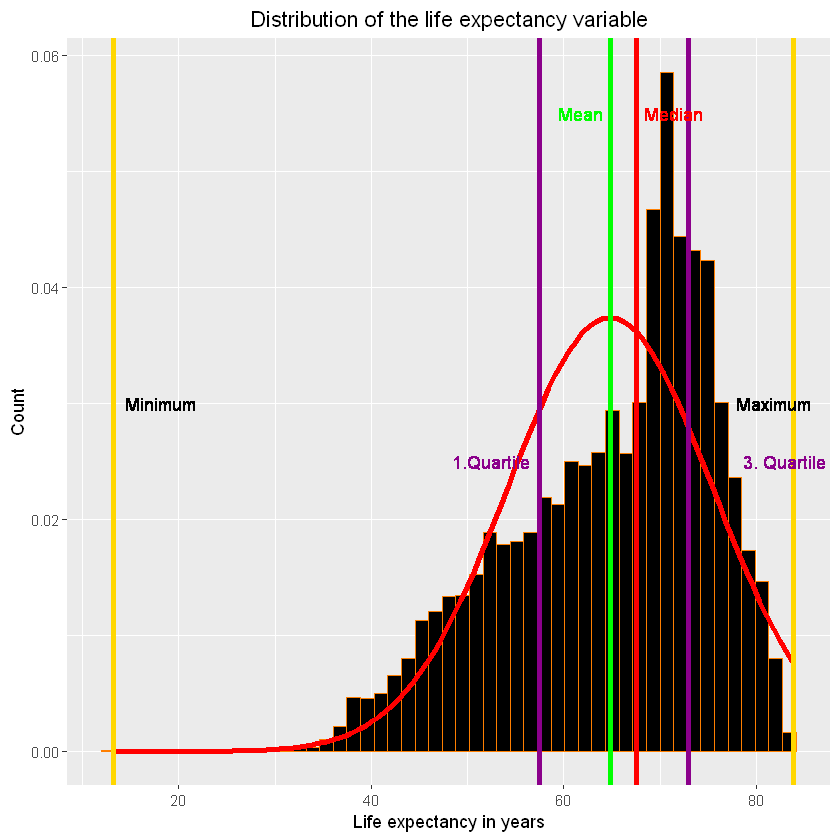

In [24]:


Freedman_Diaconis(as.numeric(gapminder$life_expectancy))

gapminder %>% ggplot(aes(x=life_expectancy))+ 
geom_histogram(colour="#FF7F00", fill="black", bins=51, aes(y =..density..)) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(gapminder$life_expectancy), 
                                       sd = sd(gapminder$life_expectancy)), color="red", size=1.5)+



geom_vline(xintercept=64.81, size=1.5, color="green")+
geom_text(aes(x=64.81-3, y=0.055, label="Mean"), color="green")+
geom_vline(xintercept=13.20, size=1.5, color="gold" )+
geom_text(aes(x=13.2+5, y=0.03, label="Minimum"))+
geom_vline(xintercept=83.90, size=1.5, color="gold" )+
geom_text(aes(x=83.90-2, y=0.03, label="Maximum"))+
geom_vline(xintercept=57.50, size=1.5, color="#8B008B" )+
geom_text(aes(x=57.50-5, y=0.025, label="1.Quartile"), color="#8B008B")+
geom_vline(xintercept=73.00, size=1.5, color="#8B008B"  )+
geom_text(aes(x=83, y=0.025, label="3. Quartile"), color="#8B008B")+
geom_vline(xintercept=67.54, size=1.5, color="red")+
geom_text(aes(x=67.54+4, y=0.055, label="Median"), color="red")+

labs(title="Distribution of the life expectancy variable", x="Life expectancy in years",
     y="Count")+
theme(plot.title=element_text(hjust=0.5))


# Median greater than mean
# Left skewed distribution
# To reduce left skewness, take squares or cubes or higher powers.
# http://fmwww.bc.edu/repec/bocode/t/transint.html

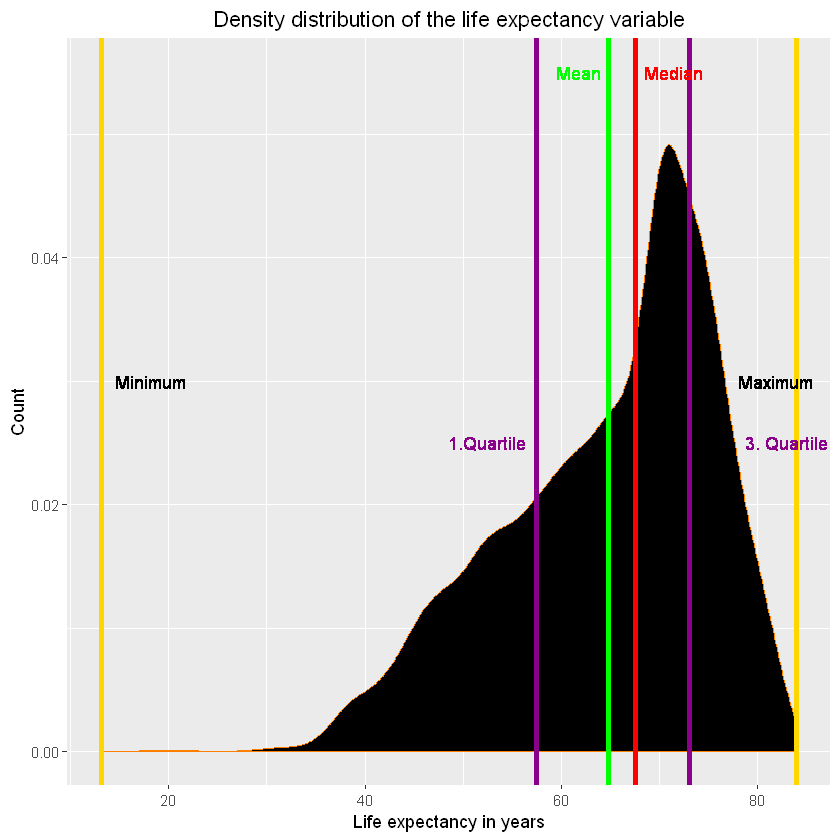

In [25]:
gapminder %>% ggplot(aes(x=life_expectancy))+ 
geom_density(colour="#FF7F00", fill="black")+

geom_vline(xintercept=64.81, size=1.5, color="green")+
geom_text(aes(x=64.81-3, y=0.055, label="Mean"), color="green")+
geom_vline(xintercept=13.20, size=1.5, color="gold" )+
geom_text(aes(x=13.2+5, y=0.03, label="Minimum"))+
geom_vline(xintercept=83.90, size=1.5, color="gold" )+
geom_text(aes(x=83.90-2, y=0.03, label="Maximum"))+
geom_vline(xintercept=57.50, size=1.5, color="#8B008B" )+
geom_text(aes(x=57.50-5, y=0.025, label="1.Quartile"), color="#8B008B")+
geom_vline(xintercept=73.00, size=1.5, color="#8B008B"  )+
geom_text(aes(x=83, y=0.025, label="3. Quartile"), color="#8B008B")+
geom_vline(xintercept=67.54, size=1.5, color="red")+
geom_text(aes(x=67.54+4, y=0.055, label="Median"), color="red")+

labs(title="Density distribution of the life expectancy variable", x="Life expectancy in years",
     y="Count")+
theme(plot.title=element_text(hjust=0.5))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.50   16.00   41.50   55.31   85.10  276.90    1453 

Warning message:
"Removed 1453 rows containing non-finite values (stat_density)."

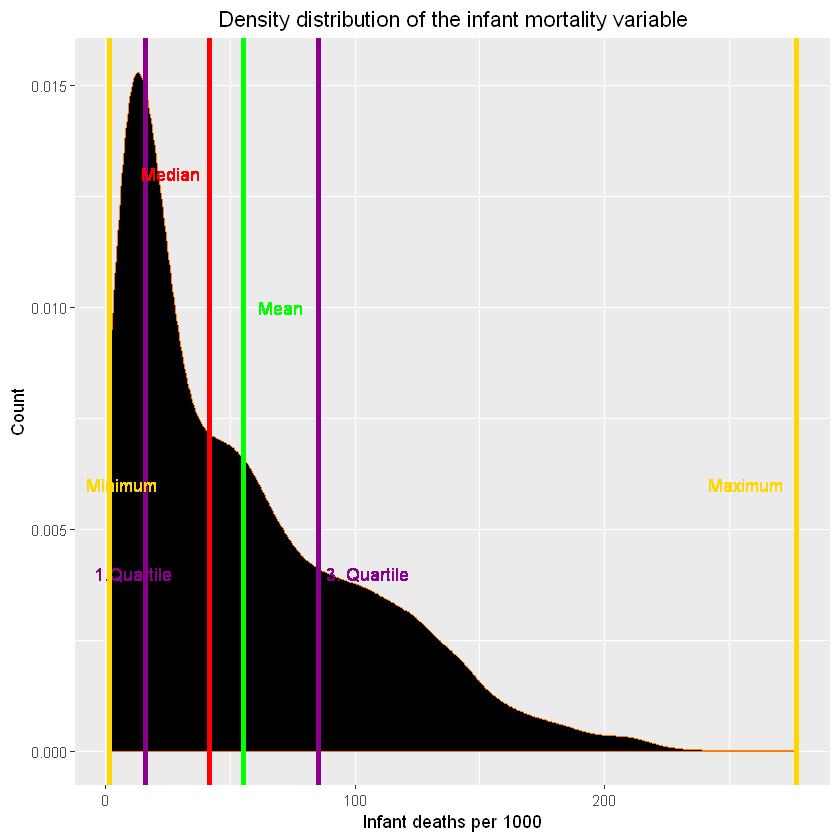

In [26]:
summary(gapminder$infant_mortality)


gapminder %>% ggplot(aes(x=infant_mortality))+ 
geom_density(colour="#FF7F00", fill="black")+


geom_vline(xintercept=55.31, size=1.5, color="green")+
geom_text(aes(x=55.31+15, y=0.01, label="Mean"), color="green")+

geom_vline(xintercept=16.00, size=1.5, color="#8B008B" )+
geom_text(aes(x=16.00-5, y=0.004, label="1.Quartile"), color="#8B008B")+

geom_vline(xintercept=85.10, size=1.5, color="#8B008B"  )+
geom_text(aes(x=85.10+20, y=0.004, label="3. Quartile"), color="#8B008B")+

geom_vline(xintercept=41.50 , size=1.5, color="red")+
geom_text(aes(x=41.50 - 15, y=0.013, label="Median"), color="red")+

geom_vline(xintercept=1.50, size=1.5, color="gold" )+
geom_text(aes(x=1.50+5, y=0.006, label="Minimum"), color="gold")+

geom_vline(xintercept=276.90, size=1.5, color="gold" )+
geom_text(aes(x=276.90-20, y=0.006, label="Maximum"), colour="gold")+


labs(title="Density distribution of the infant mortality variable", 
     x="Infant deaths per 1000", y="Count")+
theme(plot.title=element_text(hjust=0.5))


# Mean is greater than median
# Right skewed distribution
# To reduce right skewness, take roots or logarithms or reciprocals (roots
# are weakest). This is the commonest problem in practice.
# http://fmwww.bc.edu/repec/bocode/t/transint.html

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.840   2.200   3.750   4.084   6.000   9.220     187 

Warning message:
"Removed 187 rows containing non-finite values (stat_density)."

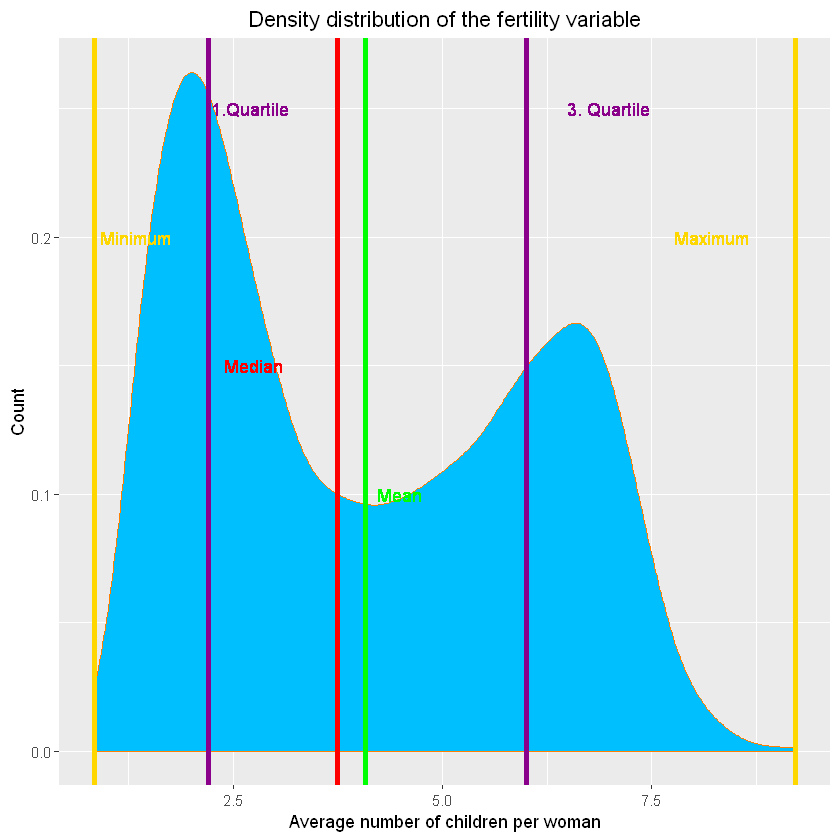

In [27]:
summary(gapminder$fertility)


gapminder %>% ggplot(aes(x=fertility))+ 
geom_density(colour="#FF7F00", fill="#00BFFF")+


geom_vline(xintercept=4.084, size=1.5, color="green")+
geom_text(aes(x=4.5, y=0.1, label="Mean"), color="green")+

geom_vline(xintercept=2.200, size=1.5, color="#8B008B" )+
geom_text(aes(x=2.7, y=0.25, label="1.Quartile"), color="#8B008B")+

geom_vline(xintercept=6.000, size=1.5, color="#8B008B"  )+
geom_text(aes(x=6.000+1, y=0.25, label="3. Quartile"), color="#8B008B")+

geom_vline(xintercept=3.750 , size=1.5, color="red")+
geom_text(aes(x=3.750 - 1, y=0.15, label="Median"), color="red")+

geom_vline(xintercept=0.840, size=1.5, color="gold" )+
geom_text(aes(x=0.840+0.5, y=0.2, label="Minimum"), color="gold")+

geom_vline(xintercept=9.220, size=1.5, color="gold" )+
geom_text(aes(x=9.220-1, y=0.2, label="Maximum"), colour="gold")+


labs(title="Density distribution of the fertility variable", 
     x="Average number of children per woman", y="Count")+
theme(plot.title=element_text(hjust=0.5))



# Multimodal distribution
# Major mode: left
# Anti-mode: right
# https://en.wikipedia.org/wiki/Multimodal_distribution

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
4.040e+07 1.846e+09 7.794e+09 1.480e+11 5.540e+10 1.174e+13      2972 

Warning message:
"Removed 2972 rows containing non-finite values (stat_bin)."

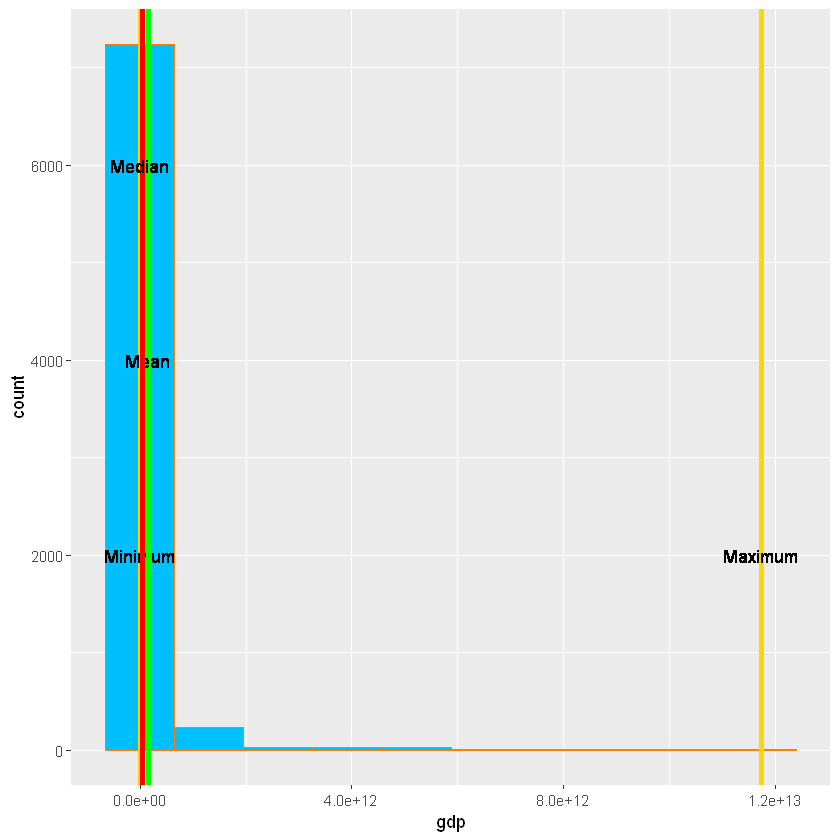

In [28]:
summary(gapminder$gdp)


gapminder %>% ggplot(aes(x=gdp))+ 
geom_histogram(colour="#FF7F00", fill="#00BFFF", bins=10)+

geom_vline(xintercept=4.040e+07, size=1.5, color="gold" )+
geom_text(aes(x=4.040e+07, y=2000, label="Minimum"), color="black")+

geom_vline(xintercept=1.174e+13 , size=1.5, color="gold" )+
geom_text(aes(x=1.174e+13 , y=2000, label="Maximum"), colour="black")+

geom_vline(xintercept=1.480e+11, size=1.5, color="green")+
geom_text(aes(x=1.600e+11, y=4000, label="Mean"), color="black")+

geom_vline(xintercept=37.794e+09 , size=1.5, color="red")+
geom_text(aes(x=7.794e+09, y=6000, label="Median"), color="black")


# It seems there is a white range of gdp-values
# Outliers?
# Or data transformation?


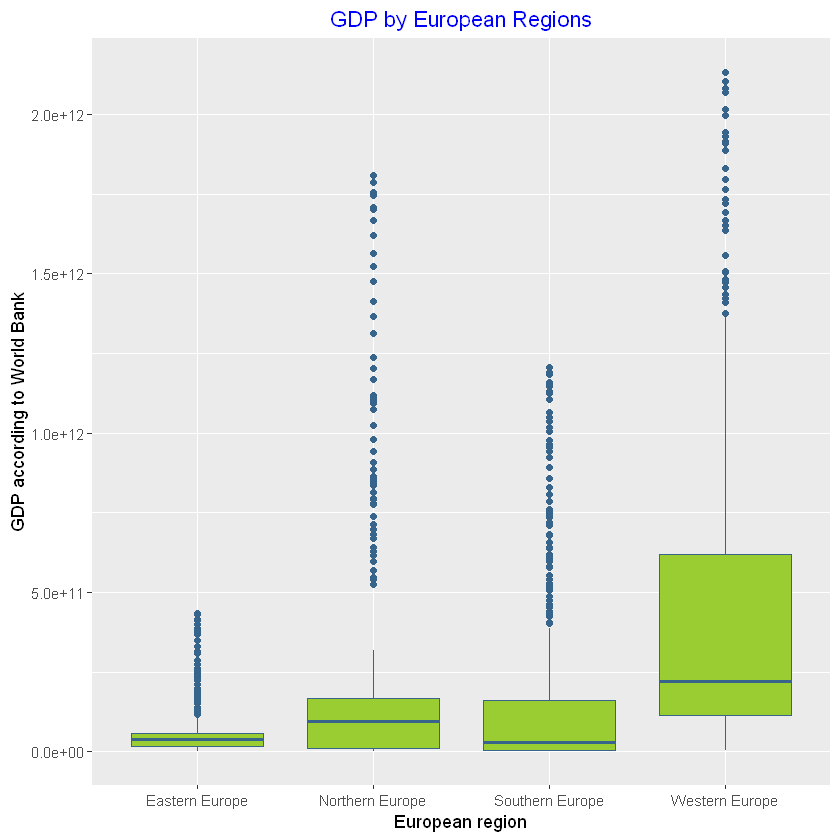

In [29]:
# Exploring some relationships between categorical variables and numerical variables
# Categorical variable: region

gap_Eur <- 
gapminder %>% 
na.omit() %>%
filter(continent=="Europe")

gap_Eur %>% ggplot(aes(x=region, y=gdp)) +
geom_boxplot(colour="#36648B", fill="#9ACD32")+
labs(title="GDP by European Regions", x="European region", y="GDP according to World Bank")+
theme(plot.title=element_text(hjust=0.5, colour="blue"))

In [30]:
# filter(starwars, hair_color == "none" | eye_color == "black")
gap_Eur_34534 <- 
gapminder %>% 
na.omit() %>%
filter(year==2011 & continent=="Europe" & gdp > 150*10^9) %>%
arrange(desc(gdp))

gap_Eur_34534
dim(gap_Eur_34534)

gap_Eur_45632 <-
gap_Eur_34534 %>% mutate(GDP_per_capita = gdp/population)

glimpse(gap_Eur_45632)



country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Germany,2011,3.4,80.5,1.40,80424665,2.131457e+12,Europe,Western Europe
United Kingdom,2011,4.2,80.5,1.90,63164949,1.756002e+12,Europe,Northern Europe
France,2011,3.5,81.6,1.98,63268405,1.506143e+12,Europe,Western Europe
Italy,2011,3.3,82.0,1.45,59678993,1.150683e+12,Europe,Southern Europe
Spain,2011,3.8,82.0,1.47,46708366,7.171940e+11,Europe,Southern Europe
Netherlands,2011,3.6,80.9,1.76,16689863,4.463622e+11,Europe,Western Europe
Russia,2011,9.8,69.8,1.58,143211476,4.331921e+11,Europe,Eastern Europe
Sweden,2011,2.4,81.7,1.90,9462352,3.167986e+11,Europe,Northern Europe
Switzerland,2011,3.8,82.6,1.51,7925813,3.009384e+11,Europe,Western Europe
Belgium,2011,3.5,80.2,1.85,11005175,2.722711e+11,Europe,Western Europe


[1] 14  9

Observations: 14
Variables: 10
$ country          <fct> Germany, United Kingdom, France, Italy, Spain, Net...
$ year             <int> 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 20...
$ infant_mortality <dbl> 3.4, 4.2, 3.5, 3.3, 3.8, 3.6, 9.8, 2.4, 3.8, 3.5, ...
$ life_expectancy  <dbl> 80.5, 80.5, 81.6, 82.0, 82.0, 80.9, 69.8, 81.7, 82...
$ fertility        <dbl> 1.40, 1.90, 1.98, 1.45, 1.47, 1.76, 1.58, 1.90, 1....
$ population       <dbl> 80424665, 63164949, 63268405, 59678993, 46708366, ...
$ gdp              <dbl> 2.131457e+12, 1.756002e+12, 1.506143e+12, 1.150683...
$ continent        <fct> Europe, Europe, Europe, Europe, Europe, Europe, Eu...
$ region           <fct> Western Europe, Northern Europe, Western Europe, S...
$ GDP_per_capita   <dbl> 26502.525, 27800.261, 23805.613, 19281.209, 15354....


In [31]:
gap_Eur_45632_gather <-
gap_Eur_45632%>% gather(key, value, gdp, GDP_per_capita)

gap_Eur_45632_gather

country,year,infant_mortality,life_expectancy,fertility,population,continent,region,key,value
Germany,2011,3.4,80.5,1.40,80424665,Europe,Western Europe,gdp,2.131457e+12
United Kingdom,2011,4.2,80.5,1.90,63164949,Europe,Northern Europe,gdp,1.756002e+12
France,2011,3.5,81.6,1.98,63268405,Europe,Western Europe,gdp,1.506143e+12
Italy,2011,3.3,82.0,1.45,59678993,Europe,Southern Europe,gdp,1.150683e+12
Spain,2011,3.8,82.0,1.47,46708366,Europe,Southern Europe,gdp,7.171940e+11
Netherlands,2011,3.6,80.9,1.76,16689863,Europe,Western Europe,gdp,4.463622e+11
Russia,2011,9.8,69.8,1.58,143211476,Europe,Eastern Europe,gdp,4.331921e+11
Sweden,2011,2.4,81.7,1.90,9462352,Europe,Northern Europe,gdp,3.167986e+11
Switzerland,2011,3.8,82.6,1.51,7925813,Europe,Western Europe,gdp,3.009384e+11
Belgium,2011,3.5,80.2,1.85,11005175,Europe,Western Europe,gdp,2.722711e+11


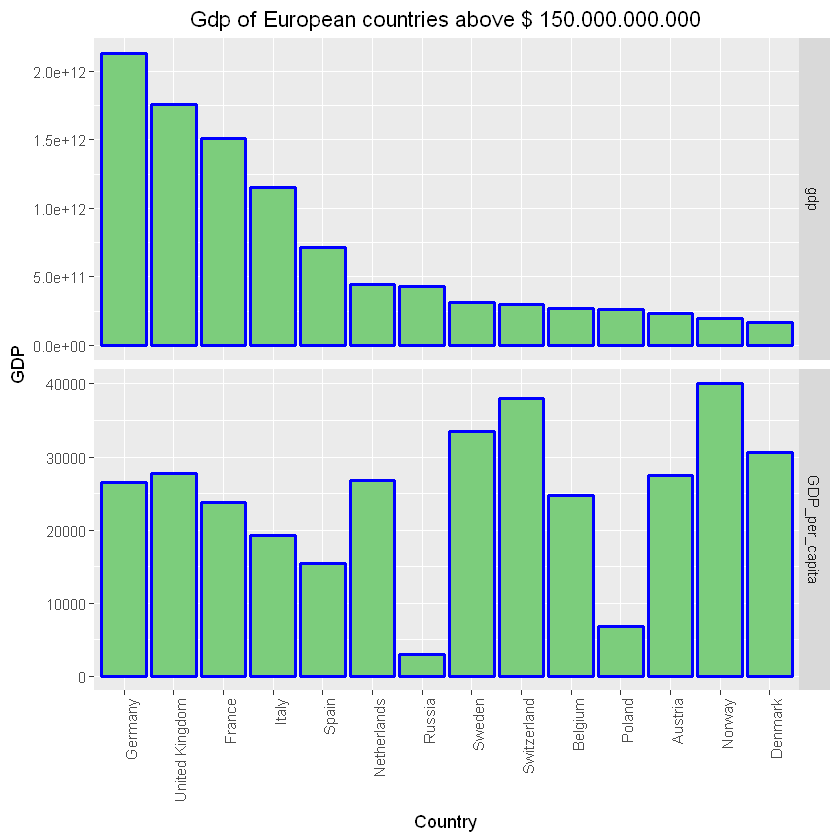

In [32]:

gap_Eur_45632_gather %>% ggplot(aes(x=reorder(country, -value), y=value, group=key)) +
geom_col(fill="#7CCD7C", colour="blue", size=1)+
theme(axis.text.x=element_text(angle = 90, hjust = 1), plot.title=element_text(hjust = 0.5))+
labs(title="Gdp of European countries above $ 150.000.000.000", x="Country", y="GDP")+
facet_grid(key~., scales = "free") + theme(legend.position = "none")



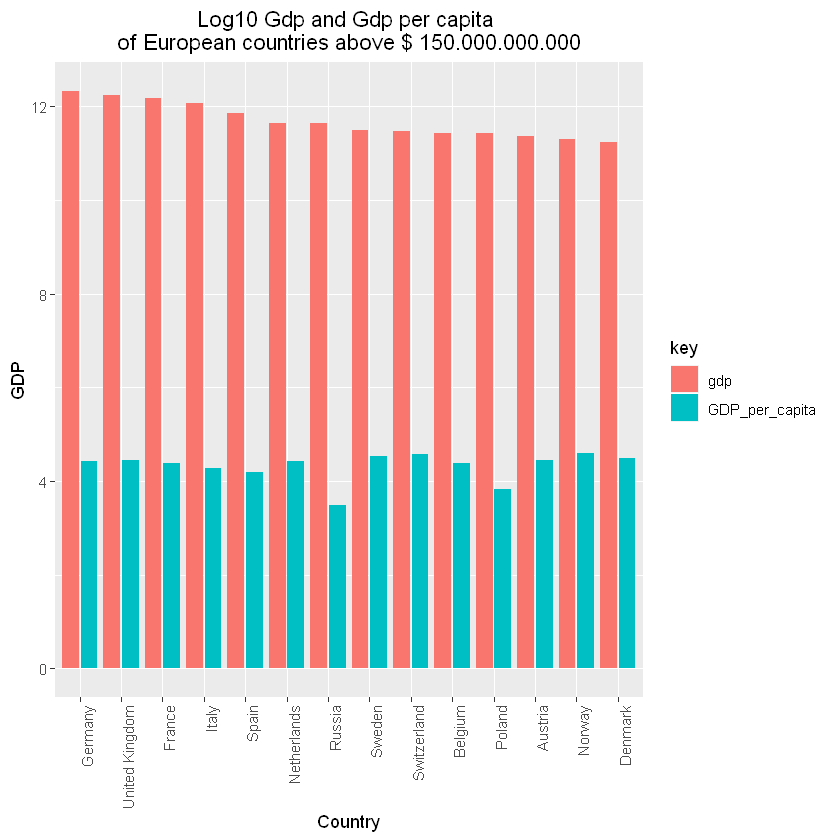

In [33]:

gap_Eur_45632_gather %>% ggplot(aes(x=reorder(country, -value), y=log10(value), group=key)) +
geom_col(aes(fill=key), position = "dodge2")+ #geom_bar(position = "fill")
theme(axis.text.x=element_text(angle = 90, hjust = 1), plot.title=element_text(hjust = 0.5))+
labs(title="Log10 Gdp and Gdp per capita 
of European countries above $ 150.000.000.000", x="Country", y="GDP")

continent,sum_pop
Asia,1634298905
Europe,605336240
Americas,424394790
Africa,278714251
Oceania,15618396


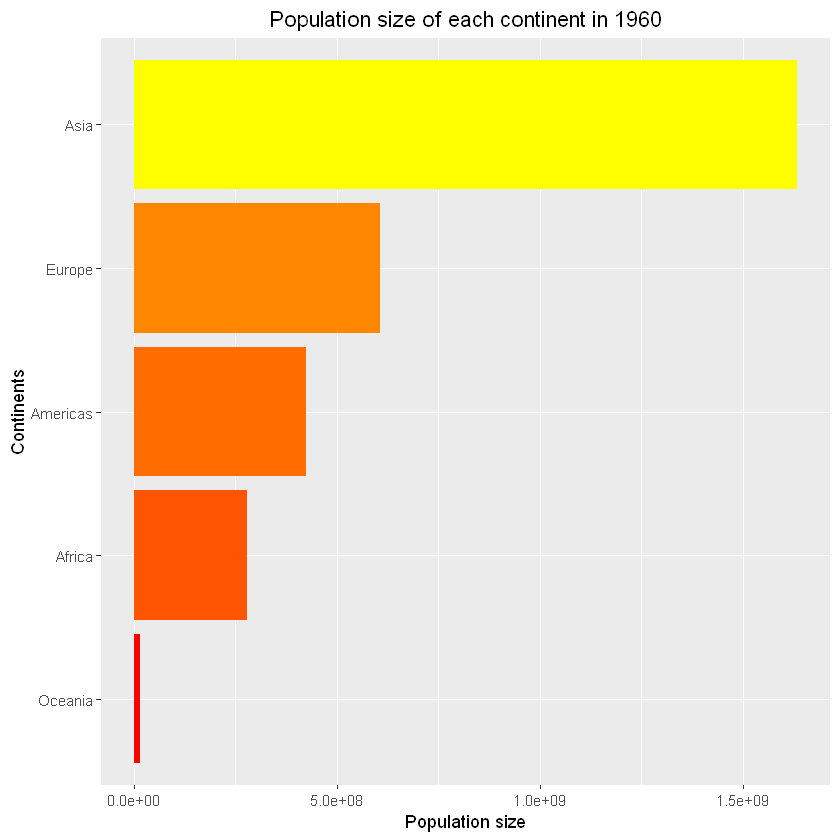

In [34]:
# Exploring some relationships between date and numerical variables
# Date variable: year

gapminder_gb_cont_1960 <-
gapminder %>% filter(year==1960) %>% 
group_by(continent) %>%
summarize(sum_pop = sum(population)) %>%
arrange(desc(sum_pop) ) 
gapminder_gb_cont_1960


# Order bar plot according to y (population)
gapminder_gb_cont_1960$continent<- factor(gapminder_gb_cont_1960$continent, 
                                          levels = 
                                          gapminder_gb_cont_1960$continent[order(gapminder_gb_cont_1960$sum_pop)])


gapminder_gb_cont_1960 %>%
ggplot(aes(x=continent, y=sum_pop, fill=sum_pop)) + 
geom_bar(stat = "identity")+ 
coord_flip()+
scale_fill_gradient( low = "red", high = "yellow",  guide=FALSE)+
labs(title="Population size of each continent in 1960", x="Continents", y="Population size")+
theme(plot.title = element_text(hjust=0.5))




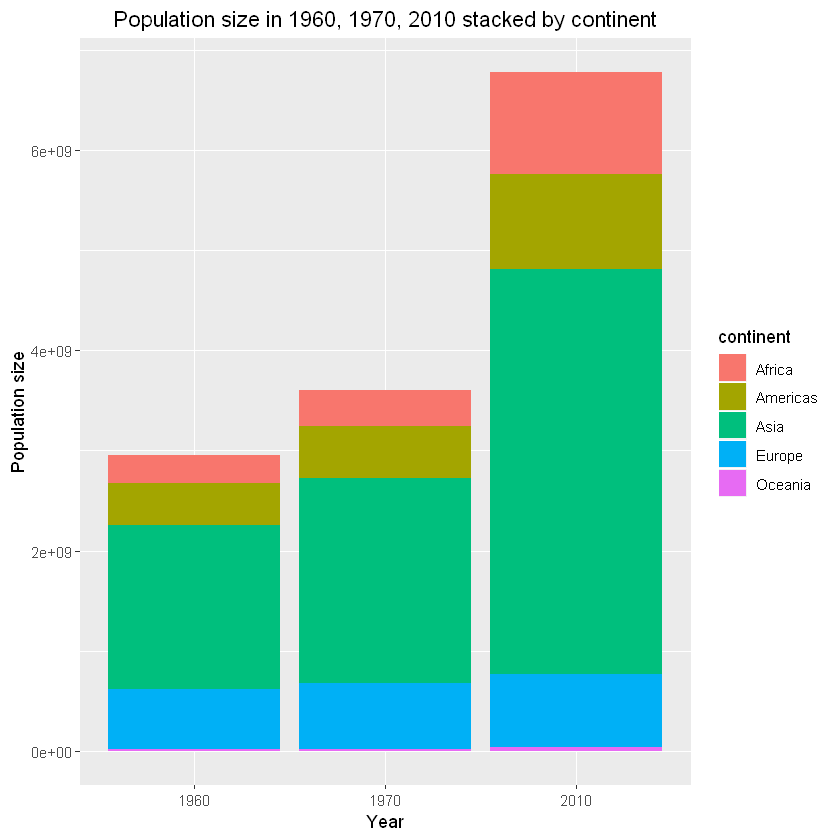

In [35]:
# Stacked barplot by continent of selected years of population size 

gapminder_gb_cont_1960_1970_2010 <- gapminder %>% filter(year==1960 | year==1970 | year==2010) %>% 
group_by(continent, year) %>%
summarize(sum_pop = sum(population)) %>%
arrange(continent, desc(year)) 



gapminder_gb_cont_1960_1970_2010 %>%
ggplot(aes(x=as.factor(year), y=sum_pop, fill=continent)) + 
geom_bar(stat = "identity")+ 
labs(title="Population size in 1960, 1970, 2010 stacked by continent", x="Year", y="Population size")+
theme(plot.title = element_text(hjust=0.5))


In [36]:
glimpse(gapminder)

gapminder_23423 <- 
gapminder %>%
select(year, continent, population) %>% 
filter(year != 2016)%>%
group_by(continent, year) %>%
summarize(pop_cont=sum(population))


glimpse(gapminder_23423)
head(gapminder_23423)
tail(gapminder_23423)


Observations: 10,545
Variables: 9
$ country          <fct> Albania, Algeria, Angola, Antigua and Barbuda, Arg...
$ year             <int> 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 19...
$ infant_mortality <dbl> 115.40, 148.20, 208.00, NA, 59.87, NA, NA, 20.30, ...
$ life_expectancy  <dbl> 62.87, 47.50, 35.98, 62.97, 65.39, 66.86, 65.66, 7...
$ fertility        <dbl> 6.19, 7.65, 7.32, 4.43, 3.11, 4.55, 4.82, 3.45, 2....
$ population       <dbl> 1636054, 11124892, 5270844, 54681, 20619075, 18673...
$ gdp              <dbl> NA, 13828152297, NA, NA, 108322326649, NA, NA, 966...
$ continent        <fct> Europe, Africa, Africa, Americas, Americas, Asia, ...
$ region           <fct> Southern Europe, Northern Africa, Middle Africa, C...
Observations: 280
Variables: 3
$ continent <fct> Africa, Africa, Africa, Africa, Africa, Africa, Africa, A...
$ year      <int> 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 196...
$ pop_cont  <dbl> 278714251, 285503724, 292539738, 299822240, 3073

continent,year,pop_cont
Africa,1960,278714251
Africa,1961,285503724
Africa,1962,292539738
Africa,1963,299822240
Africa,1964,307350161
Africa,1965,315124229


continent,year,pop_cont
Oceania,2010,36012488
Oceania,2011,36615458
Oceania,2012,37203656
Oceania,2013,37779972
Oceania,2014,38350442
Oceania,2015,38919371


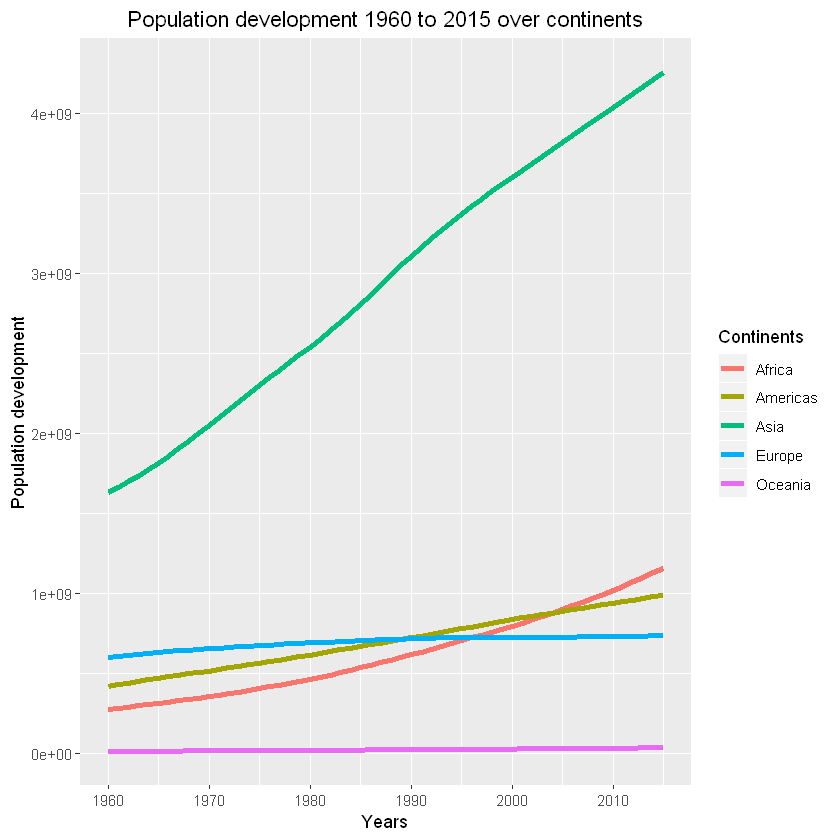

In [37]:
# Time series of population development
# Asia has the greatest populations at any time

gapminder_23423 %>%
ggplot(aes(x= year, y=pop_cont, colour=continent)) +
geom_line(size=1.5)+
labs(title="Population development 1960 to 2015 over continents", x="Years",
     y="Population development")+theme(plot.title=element_text(hjust=0.5))+
guides(colour = guide_legend("Continents"))+
scale_x_continuous(breaks = c(1960 , 1970, 1980, 1990, 2000, 2010))


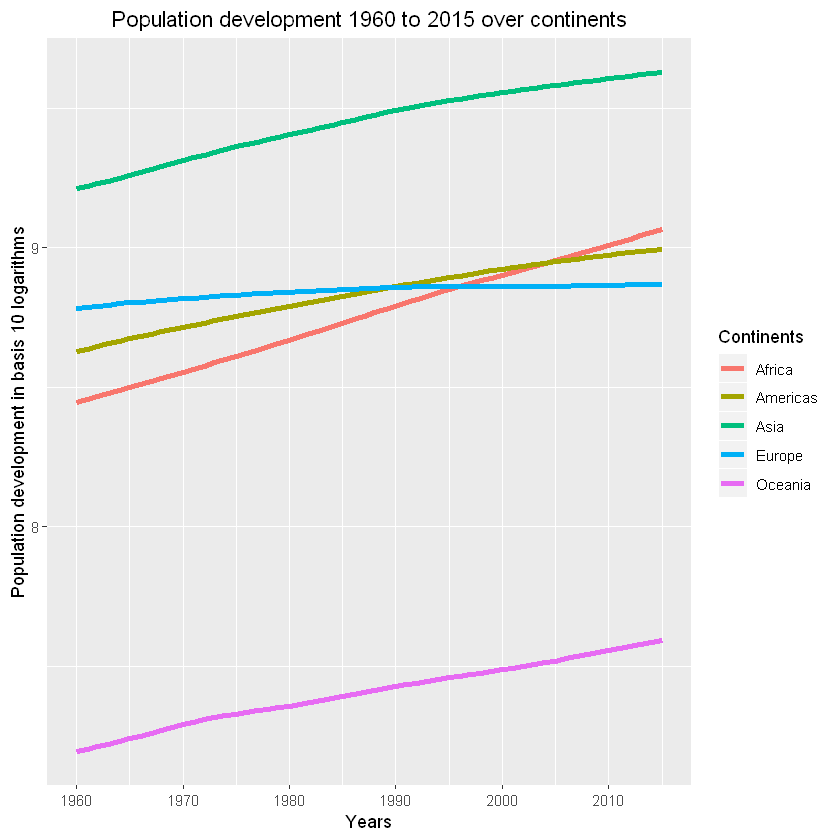

In [38]:
# Time series of population development
# Logarithmic scale makes differences in growth rates clearer
# It seems Africa hast the greatest population growth rate

gapminder_23423 %>%
ggplot(aes(x= year, y=log10(pop_cont), colour=continent)) +
geom_line(size=1.5)+
labs(title="Population development 1960 to 2015 over continents", x="Years",
     y="Population development in basis 10 logarithms")+theme(plot.title=element_text(hjust=0.5))+
guides(colour = guide_legend("Continents"))+
scale_x_continuous(breaks = c(1960 , 1970, 1980, 1990, 2000, 2010))


In [39]:
# Isolate or spread one column continent into columns for each continent

gapminder_spread <-
gapminder %>% select(year, continent, population) %>% 
group_by(continent, year) %>% summarize(pop_cont=sum(population)) %>%
spread(continent, pop_cont) %>% slice(1:56)

head(gapminder_spread)


nrow(gapminder_spread)



year,Africa,Americas,Asia,Europe,Oceania
1960,278714251,424394790,1634298905,605336240,15618396
1961,285503724,433877556,1666963346,611395820,15939360
1962,292539738,443435765,1700988075,617526205,16259778
1963,299822240,453015223,1736816136,623587410,16588712
1964,307350161,462552420,1774992376,629393357,16938503
1965,315124229,472004870,1815851436,634814032,17316896


[1] 56

In [40]:
gapminder_78978 <- 
gapminder %>%
select(year, country, continent, population) %>% 
filter(continent=="Europe")%>%
filter(year != 2016) %>%
group_by(country, year) %>%
summarize(pop_cont=population)

head(gapminder_78978)
tail(gapminder_78978)

country,year,pop_cont
Albania,1960,1636054
Albania,1961,1685901
Albania,1962,1737645
Albania,1963,1790533
Albania,1964,1843596
Albania,1965,1896125


country,year,pop_cont
United Kingdom,2010,62716684
United Kingdom,2011,63164949
United Kingdom,2012,63573766
United Kingdom,2013,63955654
United Kingdom,2014,64331348
United Kingdom,2015,64715810


In [41]:
glimpse(gapminder)

gapminder_7893 <- 
gapminder %>%
filter(!is.na(gdp)) %>%
select(year, continent, gdp) %>% 
filter(year != 2016)%>%
group_by(continent, year) %>%
summarize(gdp_cont=sum(gdp))

sum(is.na(gapminder_7893))
head(gapminder_7893)
glimpse(gapminder_7893)

summary(gapminder$gdp)

Observations: 10,545
Variables: 9
$ country          <fct> Albania, Algeria, Angola, Antigua and Barbuda, Arg...
$ year             <int> 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 19...
$ infant_mortality <dbl> 115.40, 148.20, 208.00, NA, 59.87, NA, NA, 20.30, ...
$ life_expectancy  <dbl> 62.87, 47.50, 35.98, 62.97, 65.39, 66.86, 65.66, 7...
$ fertility        <dbl> 6.19, 7.65, 7.32, 4.43, 3.11, 4.55, 4.82, 3.45, 2....
$ population       <dbl> 1636054, 11124892, 5270844, 54681, 20619075, 18673...
$ gdp              <dbl> NA, 13828152297, NA, NA, 108322326649, NA, NA, 966...
$ continent        <fct> Europe, Africa, Africa, Americas, Americas, Asia, ...
$ region           <fct> Southern Europe, Northern Africa, Middle Africa, C...


[1] 0

continent,year,gdp_cont
Africa,1960,116871922456
Africa,1961,120214511198
Africa,1962,124778536835
Africa,1963,135537136432
Africa,1964,143308581668
Africa,1965,152402001778


Observations: 260
Variables: 3
$ continent <fct> Africa, Africa, Africa, Africa, Africa, Africa, Africa, A...
$ year      <int> 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 196...
$ gdp_cont  <dbl> 116871922456, 120214511198, 124778536835, 135537136432, 1...


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
4.040e+07 1.846e+09 7.794e+09 1.480e+11 5.540e+10 1.174e+13      2972 

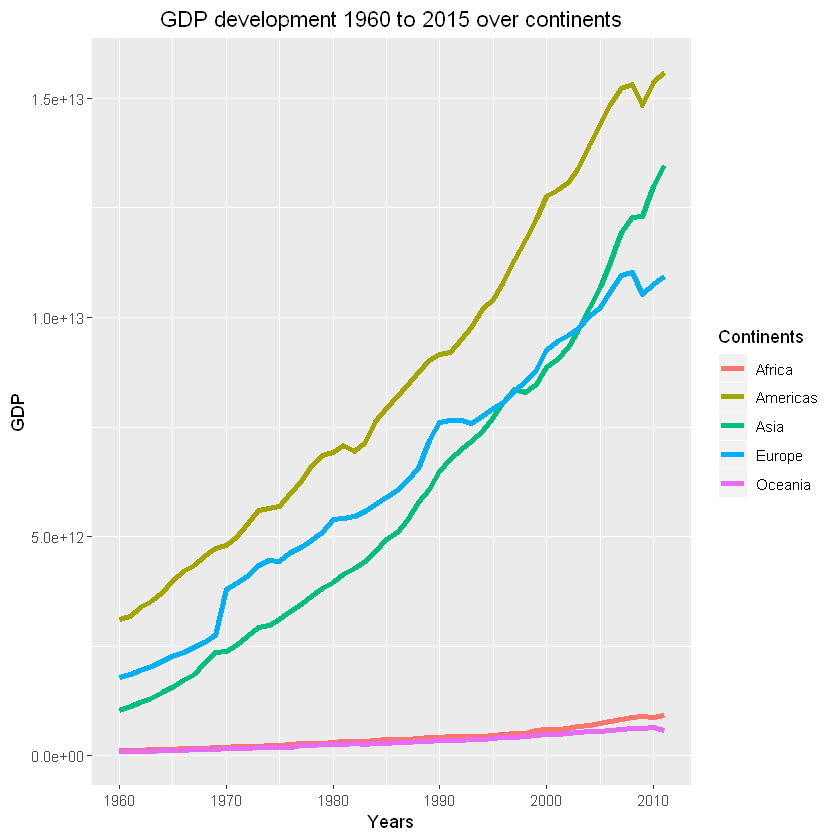

In [42]:
gapminder_7893 %>%
ggplot(aes(x= year, y=gdp_cont, colour=continent)) +
geom_line(size=1.5)+
labs(title="GDP development 1960 to 2015 over continents", x="Years",
     y="GDP")+theme(plot.title=element_text(hjust=0.5))+
guides(colour = guide_legend("Continents"))+
scale_x_continuous(breaks = c(1960 , 1970, 1980, 1990, 2000, 2010))

# GDP has a lot of NA values
# Does it make sense using GDP in a data model?
# Filter or omit NA-values?
# Substitute GDP NA values?
# Decision: Filter for NA-values

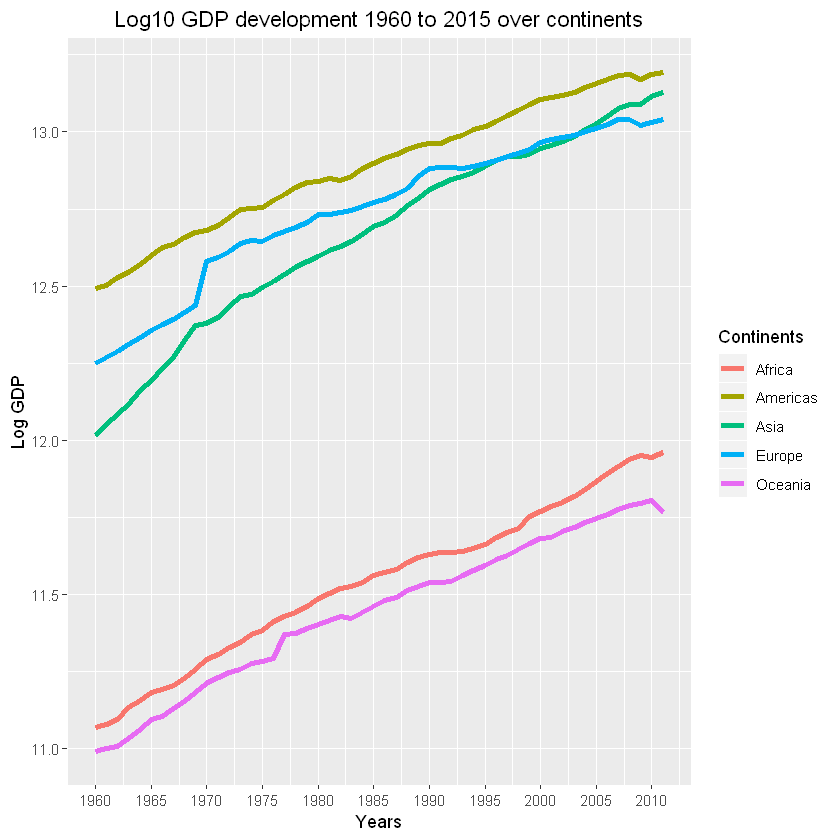

In [43]:
gapminder_7893 %>%
ggplot(aes(x= year, y=log10(gdp_cont), colour=continent)) +
geom_line(size=1.5)+
labs(title="Log10 GDP development 1960 to 2015 over continents", x="Years",
     y="Log GDP")+theme(plot.title=element_text(hjust=0.5))+
guides(colour = guide_legend("Continents"))+
scale_x_continuous(breaks = c(1960 , 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015))

# It seems gdp growth of Asia is accelerating fast

In [44]:
# Get a clearer picture of na-values
# Extract na-values by continent using a dplyr combination

gapminder_0563 <- 
gapminder %>%
select(year, continent, gdp) %>% 
filter(is.na(gdp))%>%
filter(year != 2016)%>%
group_by(continent, year) %>%
summarize(Number_na = n())

head(gapminder_0563 )
glimpse(gapminder_0563 )



continent,year,Number_na
Africa,1960,19
Africa,1961,18
Africa,1962,18
Africa,1963,18
Africa,1964,18
Africa,1965,18


Observations: 227
Variables: 3
$ continent <fct> Africa, Africa, Africa, Africa, Africa, Africa, Africa, A...
$ year      <int> 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 196...
$ Number_na <int> 19, 18, 18, 18, 18, 18, 17, 16, 16, 16, 14, 14, 14, 14, 1...


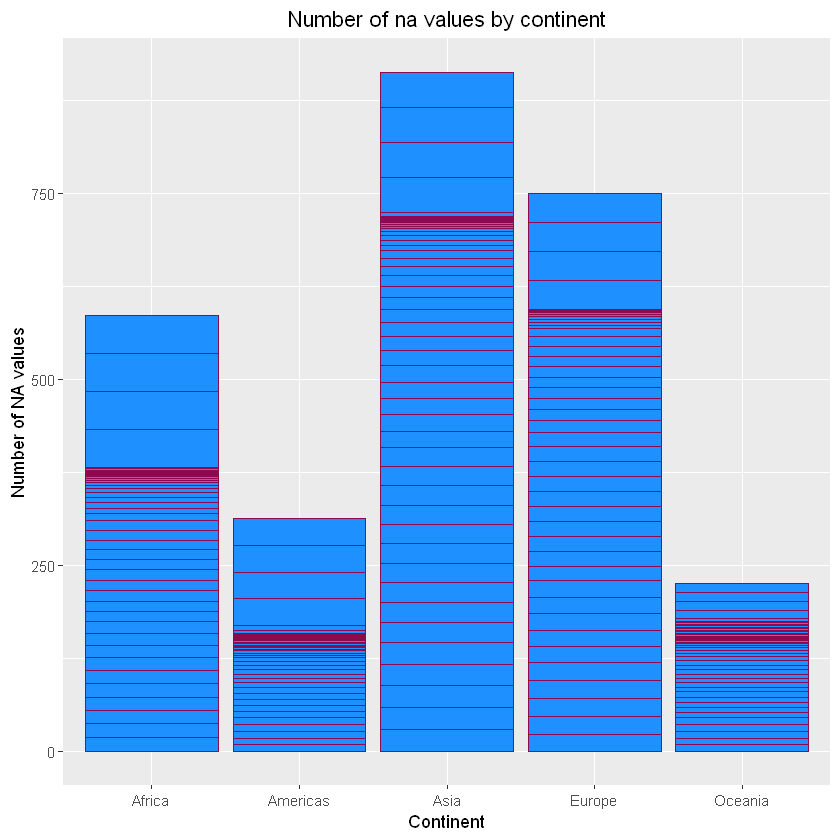

In [45]:
# Show na values with a bar plot 

gapminder_0563 %>%
ggplot(aes(x=continent, y= Number_na)) +
geom_col(color=c("#8B0A50"), fill=c("#1E90FF"))+
labs(title="Number of na values by continent", x="Continent", y="Number of NA values")+
theme(plot.title=element_text(hjust=0.5))

In [46]:
# Show and calculate proportions of na-values on total na-values

Total_na <- sum(is.na(gapminder$gdp))

gapminder_1289 <- 
gapminder %>%
select(year, continent, gdp) %>% 
filter(is.na(gdp))%>%
filter(year != 2016)%>%
group_by(continent, year) %>%
summarize(Proportions_Number_na = n()/Total_na)

head(gapminder_1289 )

continent,year,Proportions_Number_na
Africa,1960,0.006393001
Africa,1961,0.006056528
Africa,1962,0.006056528
Africa,1963,0.006056528
Africa,1964,0.006056528
Africa,1965,0.006056528


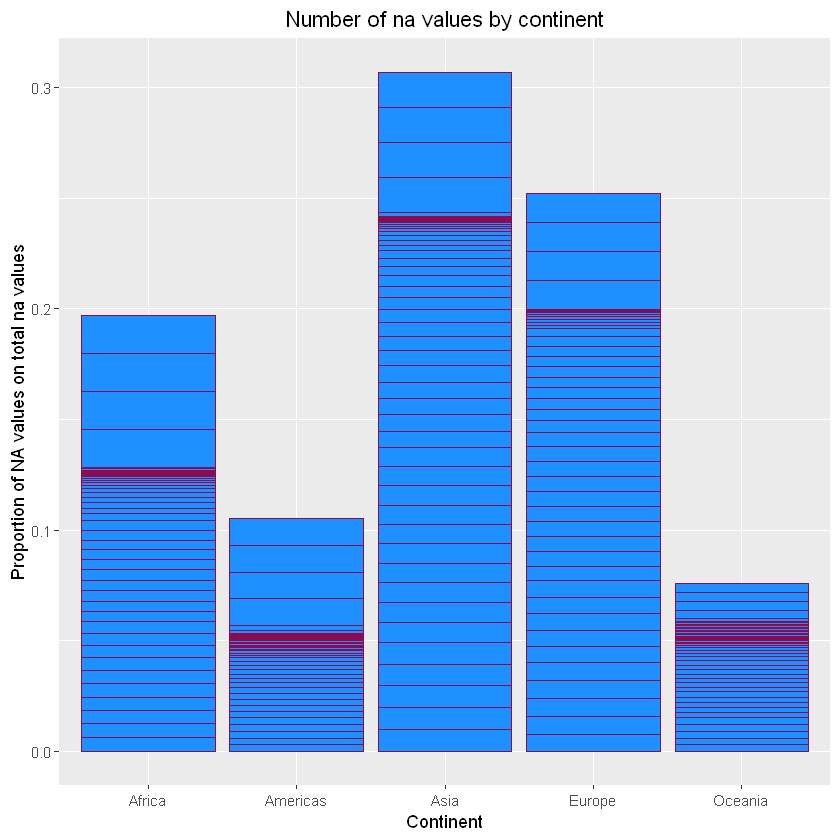

In [47]:
gapminder_1289  %>%
ggplot(aes(x=continent, y= Proportions_Number_na)) +
geom_col(color=c("#8B0A50"), fill=c("#1E90FF"))+
labs(title="Number of na values by continent", x="Continent", y="Proportion of NA values on total na values")+
theme(plot.title=element_text(hjust=0.5))

In [48]:
# Investigating selected countries Bric + G7

# levels(gapminder$country)

gapminder8754 <-
gapminder %>% 
filter(country =="Brazil" | country == "China" | country == "United States" | country == "Germany" | country == "Japan" |
       country =="France" | country == "Russia" | country == "United Kingdom" | country ==  "India" | 
       country == "Italy" | country == "Canada") 

head(gapminder8754)
 
gapminder3439 <-
gapminder8754 %>% group_by(country, year) %>% summarize(sum_fert = fertility)

head(gapminder3439)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Brazil,1960,129.4,55.27,6.21,72493585,105343379555,Americas,South America
Canada,1960,27.8,71.00,3.91,17909232,167894860728,Americas,Northern America
China,1960,190.0,30.53,3.99,644450173,70348527260,Asia,Eastern Asia
France,1960,23.7,70.49,2.77,45865699,349778187326,Europe,Western Europe
Germany,1960,34.0,69.26,2.41,73179665,NA,Europe,Western Europe
India,1960,165.1,41.26,5.87,449661874,81042654922,Asia,Southern Asia


country,year,sum_fert
Brazil,1960,6.21
Brazil,1961,6.19
Brazil,1962,6.14
Brazil,1963,6.06
Brazil,1964,5.95
Brazil,1965,5.82


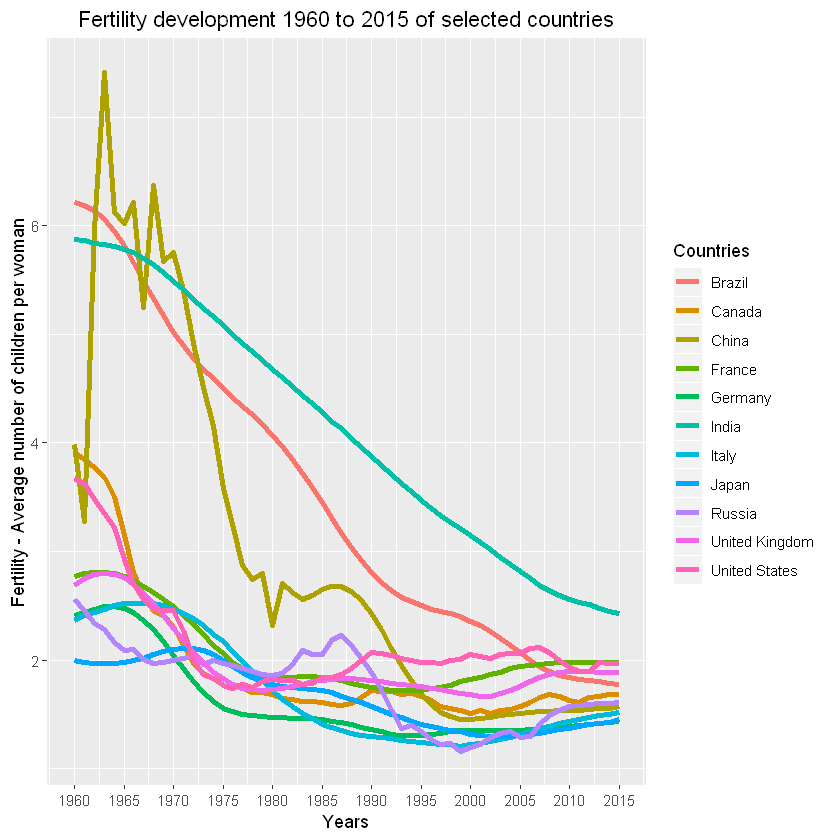

In [49]:
gapminder3439 %>% filter(!is.na(sum_fert)) %>%
ggplot(aes(x=year, y=sum_fert, colour=country)) + geom_line(size=1.5)+
labs(title="Fertility development 1960 to 2015 of selected countries", x="Years",
     y="Fertility - Average number of children per woman")+
theme(plot.title=element_text(hjust=0.5))+
guides(colour = guide_legend("Countries"))+
scale_x_continuous(breaks = c(1960 , 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015))

Fertility decreases over in the selected countries in principal till 1995. By then for countries 
like Italy, UK, Russia and others a slight increase occurs.

In [50]:
gapminder_China <-
gapminder %>% 
filter(country == "China") %>%
group_by(country, year) %>% summarize(sum_fert = fertility)

head(gapminder_China)




country,year,sum_fert
China,1960,3.99
China,1961,3.28
China,1962,5.97
China,1963,7.41
China,1964,6.12
China,1965,6.02


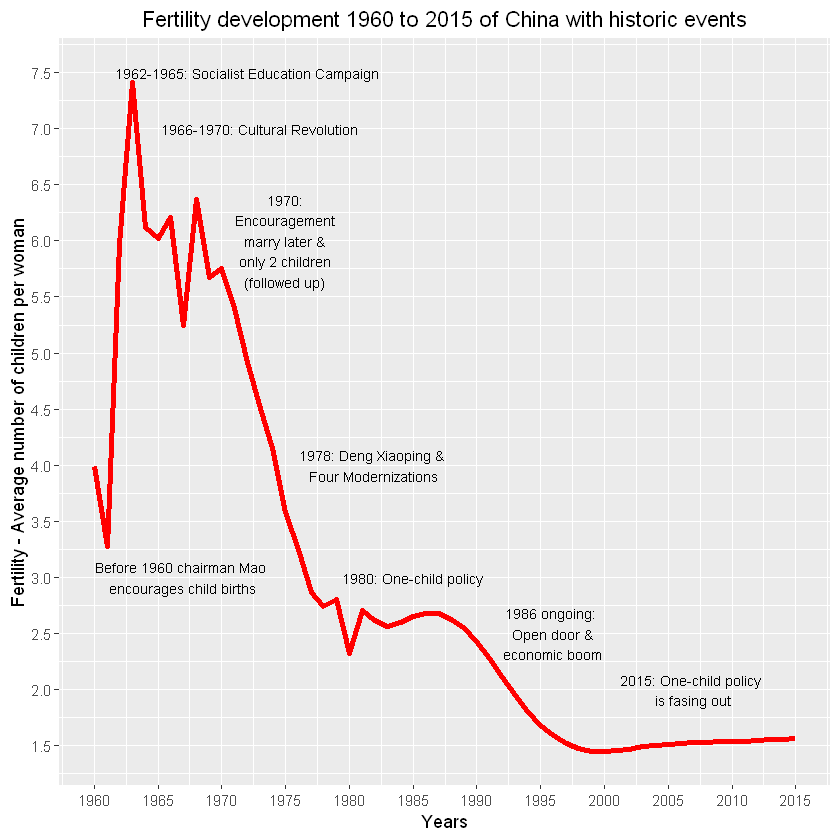

In [51]:

gapminder_China %>% filter(!is.na(sum_fert)) %>%
ggplot(aes(x=year, y=sum_fert, colour=country)) + geom_line(size=1.5, colour="red")+
labs(title="Fertility development 1960 to 2015 of China with historic events", x="Years",
     y="Fertility - Average number of children per woman")+
theme(plot.title=element_text(hjust=0.5))+
guides(colour = guide_legend("Continents"))+

scale_x_continuous(breaks = seq(from=1960, to=2015, by=5))+

scale_y_continuous(breaks = seq(from=0, to=8, by=0.5))+

geom_text(aes(x=1967, y=3, label= "Before 1960 chairman Mao 
encourages child births"),
          color="black", size=3)+
geom_text(aes(x=1972, y=7.5, label= "1962-1965: Socialist Education Campaign"),
          color="black", size=3)+

geom_text(aes(x=1975, y=6, label="1970:
Encouragement
marry later &
only 2 children
(followed up)"), color="black", size=3)+

geom_text(aes(x=1973, y=7, label="1966-1970: Cultural Revolution"), color="black", size=3)+


geom_text(aes(x=1982, y=4, label="1978: Deng Xiaoping & 
Four Modernizations"), color="black", size=3)+

geom_text(aes(x=1985, y=3, label="1980: One-child policy"), color="black", size=3)+

geom_text(aes(x=1996, y=2.5, label="1986 ongoing: 
Open door &
economic boom"), color="black", size=3)+

geom_text(aes(x=2007, y=2, label="2015: One-child policy 
is fasing out"), color="black", size=3)


In [52]:
sum(gapminder$gdp, na.rm=TRUE)

gapminder_China_fert_gdp <-
gapminder %>% filter(!is.na(gdp)) %>%
filter(country == "China") %>%
group_by(country, year) %>% summarize(fertility, gdp)

head(gapminder_China_fert_gdp)

gapminder_China_fert_gdp <-
gapminder_China_fert_gdp %>% mutate(prop_gdp = gdp/sum(gapminder$gdp, na.rm=TRUE))

head(gapminder_China_fert_gdp)



[1] 1.120459e+15

country,year,fertility,gdp
China,1960,3.99,70348527260
China,1961,3.28,51282752582
China,1962,5.97,48151766858
China,1963,7.41,53131628623
China,1964,6.12,61546062211
China,1965,6.02,71616855292


country,year,fertility,gdp,prop_gdp
China,1960,3.99,70348527260,6.278547e-05
China,1961,3.28,51282752582,4.576942e-05
China,1962,5.97,48151766858,4.297505e-05
China,1963,7.41,53131628623,4.741953e-05
China,1964,6.12,61546062211,5.492934e-05
China,1965,6.02,71616855292,6.391744e-05


In [53]:
# Goal: make a comparison between fertitlity and gdp development of China
# Making one column with this variable using gather of tidyr

glimpse(gapminder_China_fert_gdp )

gapminder_China_gather <- 
gapminder_China_fert_gdp %>%
gather(my_key, Values, -country, -year, -prop_gdp )

head(gapminder_China_gather)


Observations: 52
Variables: 5
$ country   <fct> China, China, China, China, China, China, China, China, C...
$ year      <int> 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 196...
$ fertility <dbl> 3.99, 3.28, 5.97, 7.41, 6.12, 6.02, 6.21, 5.25, 6.37, 5.6...
$ gdp       <dbl> 70348527260, 51282752582, 48151766858, 53131628623, 61546...
$ prop_gdp  <dbl> 6.278547e-05, 4.576942e-05, 4.297505e-05, 4.741953e-05, 5...


country,year,prop_gdp,my_key,Values
China,1960,6.278547e-05,fertility,3.99
China,1961,4.576942e-05,fertility,3.28
China,1962,4.297505e-05,fertility,5.97
China,1963,4.741953e-05,fertility,7.41
China,1964,5.492934e-05,fertility,6.12
China,1965,6.391744e-05,fertility,6.02


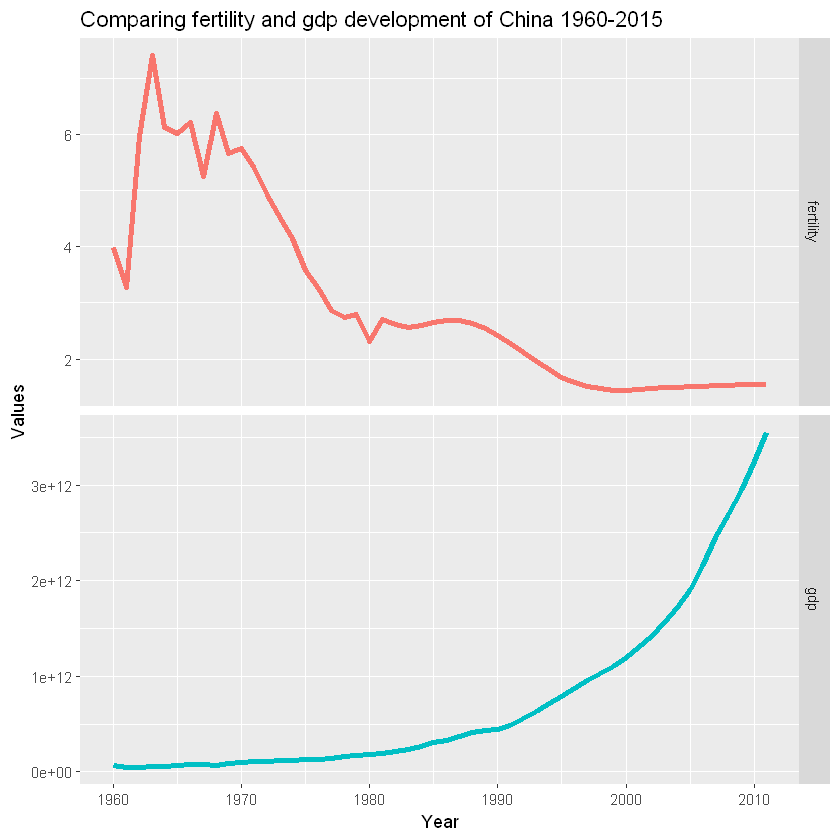

In [54]:
# Comparing a fertitlity and gdp with facet grid plots
gapminder_China_gather %>% 
ggplot(aes(x=year, y=Values, colour=my_key))+
geom_line(size=1.5)+
facet_grid(my_key ~ ., scales = "free_y") + theme(legend.position = "none")+
labs(title="Comparing fertility and gdp development of China 1960-2015",
     x="Year")

In [55]:
# Seeing the strength of correlations between numerical variables by onstructing a correlation matrix 
# Correlations are indicators for relationships
# Such correlations can be used in feature engineering of data models
# install.package(ggcorrplot, repos = c("http://rstudio.org/_packages","http://cran.rstudio.com")
library(ggcorrplot)

In [56]:
# Select numerical variables

glimpse(gapminder)

gapminder_num <- 
gapminder %>% 
filter(year != 2016) %>%
na.omit() %>%
select(infant_mortality , life_expectancy, fertility, population,  gdp  ) 

head(gapminder_num)
sum(is.na(gapminder_num))



Observations: 10,545
Variables: 9
$ country          <fct> Albania, Algeria, Angola, Antigua and Barbuda, Arg...
$ year             <int> 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 19...
$ infant_mortality <dbl> 115.40, 148.20, 208.00, NA, 59.87, NA, NA, 20.30, ...
$ life_expectancy  <dbl> 62.87, 47.50, 35.98, 62.97, 65.39, 66.86, 65.66, 7...
$ fertility        <dbl> 6.19, 7.65, 7.32, 4.43, 3.11, 4.55, 4.82, 3.45, 2....
$ population       <dbl> 1636054, 11124892, 5270844, 54681, 20619075, 18673...
$ gdp              <dbl> NA, 13828152297, NA, NA, 108322326649, NA, NA, 966...
$ continent        <fct> Europe, Africa, Africa, Americas, Americas, Asia, ...
$ region           <fct> Southern Europe, Northern Africa, Middle Africa, C...


,infant_mortality,life_expectancy,fertility,population,gdp
2,148.20,47.50,7.65,11124892,13828152297
5,59.87,65.39,3.11,20619075,108322326649
8,20.30,70.87,3.45,10292328,96677859364
9,37.30,68.75,2.70,7065525,52392699681
11,51.00,62.00,4.50,109526,1306269490
13,176.30,46.20,6.73,48200702,12767231590


[1] 0

,infant_mortality,life_expectancy,fertility,population,gdp
infant_mortality,1.0000,-0.9205,0.8449,0.0016,-0.1850
life_expectancy,-0.9205,1.0000,-0.8308,0.0078,0.2135
fertility,0.8449,-0.8308,1.0000,-0.0965,-0.2137
population,0.0016,0.0078,-0.0965,1.0000,0.2792
gdp,-0.1850,0.2135,-0.2137,0.2792,1.0000


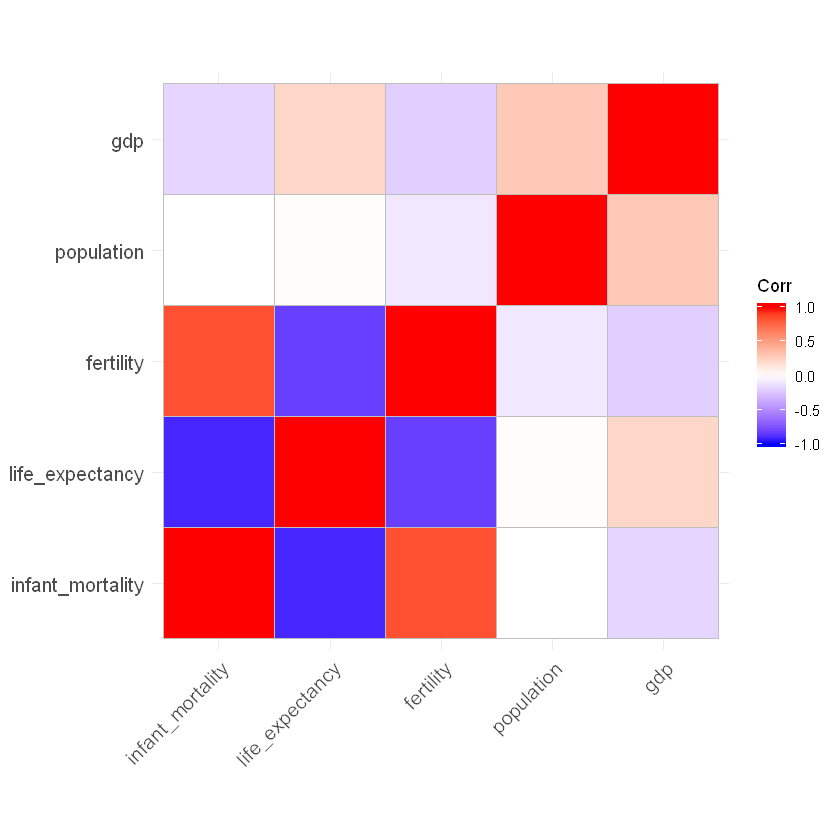

In [57]:

# Calculate correlations and build a correlation matrix

cor_matrix_gap <- round(cor(gapminder_num), 4)
cor_matrix_gap

# Input correlations into correlation matrix visualization

ggcorrplot(cor_matrix_gap)

In [58]:
# Inspired by the correlations plot the relationship between x=infant_mortality, y=life_expectancy
# infant_mortality. Infant deaths per 1000.
# life_expectancy. Life expectancy in years


summary(gapminder$infant_mortality)
summary(gapminder$life_expectancy)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.50   16.00   41.50   55.31   85.10  276.90    1453 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.20   57.50   67.54   64.81   73.00   83.90 


Call:
lm(formula = life_expectancy ~ infant_mortality, data = gapminder)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.946  -2.176   0.359   2.717  17.838 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      76.1542888  0.0673162  1131.3   <2e-16 ***
infant_mortality -0.2041411  0.0009215  -221.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.193 on 9090 degrees of freedom
  (1453 observations deleted due to missingness)
Multiple R-squared:  0.8437,	Adjusted R-squared:  0.8437 
F-statistic: 4.908e+04 on 1 and 9090 DF,  p-value: < 2.2e-16


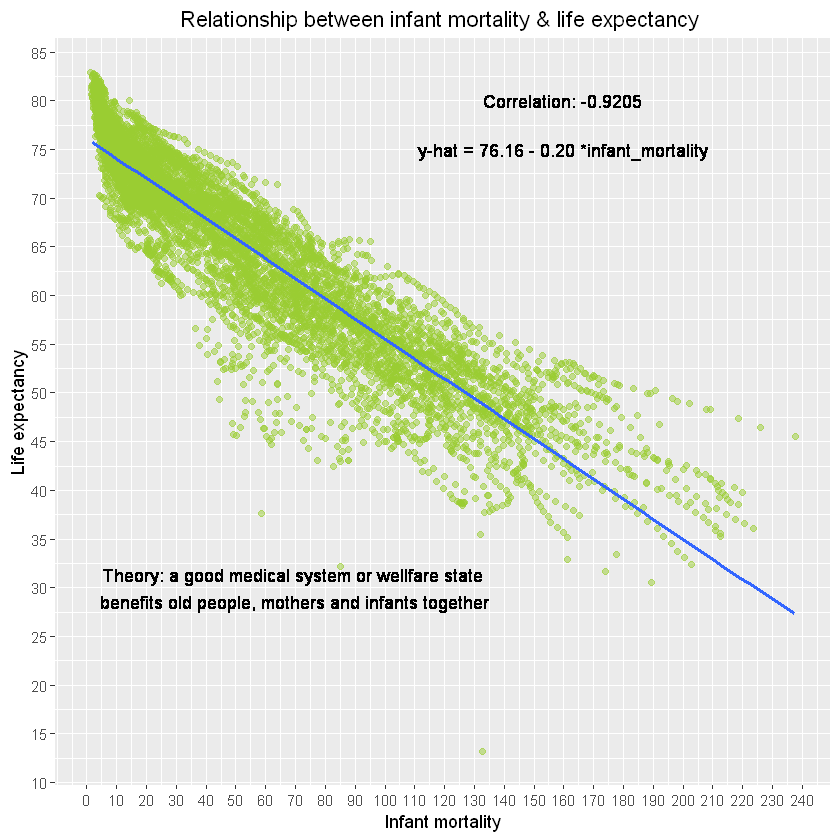

In [59]:
# Visualization of the relationship between x=infant_mortality, y=life_expectancy
# Deriving the regression formula by building a linear regression model 

summary(lm(life_expectancy~infant_mortality, data=gapminder))

gapminder %>% na.omit() %>%
ggplot(aes(x=infant_mortality, y=life_expectancy)) +
geom_jitter(alpha=0.5, width=0.6, colour="#9ACD32")+
geom_smooth(method="lm", se=FALSE)+
labs(title="Relationship between infant mortality & life expectancy ", 
     x="Infant mortality", y="Life expectancy")+
theme(plot.title=element_text(hjust=0.5))+
scale_x_continuous(breaks=seq(from=0, to=240, by=10))+
scale_y_continuous(breaks=seq(from=0, to=100, by=5))+
geom_text(aes(x=160, y=80, label="Correlation: -0.9205"))+
geom_text(aes(x=160, y=75, label="y-hat = 76.16 - 0.20 *infant_mortality"))+
geom_text(aes(x=70, y=30, label="Theory: a good medical system or wellfare state 
benefits old people, mothers and infants together"))

# Correlation
# Infant_mortality & life_expectancy are negatively related 
# The higher Infant_mortality the lower is life_expectancy
# The higher life_expectancy the lower is Infant_mortality 
# The negative correlation is very high

# Inference
# Both variables are signficant with a p-value below 0.05

# Regression
# For every unit in infant_mortality life_expectancy is decreasing by -0.2041411

# What are the theoretical reasons for this relationship?
# Assumption: a good medical system or wellfare state benefits old people, mothers and infants together

In [60]:
# install.packages("moderndive", repos='http://cran.us.r-project.org')
library(moderndive)

Warning message:
"package 'moderndive' was built under R version 3.5.2"

In [61]:
# Inspired by the correlations plot the relationship between x=infant_mortality, y=life_expectancy
# is further investigated
# Split data into training and test set
# A simple linear regression model is built
# Make predictions on training and test set
# Compare performance with evaluation metrics


# Get acquainted 
set.seed(123)
x345 <- 1:12
x345
sample(x345, size=3)

# Shuffle data set randomly

set.seed(456)
gapminder_shuffled <-
gapminder[sample(nrow(gapminder)), ]

# The dataset is shuffled as can be seen with the index number starting with 945
head(gapminder_shuffled )
dim(gapminder_shuffled)


[1]  1  2  3  4  5  6  7  8  9 10 11 12

[1] 4 9 5

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
945,Bolivia,1965,159.4,45.62,6.59,4070590,3810638169,Americas,South America
2220,Zimbabwe,1971,71.6,57.63,7.42,5385342,2921647386,Africa,Eastern Africa
7728,Samoa,2001,17.9,71.00,4.48,175567,263035596,Oceania,Polynesia
8984,Malawi,2008,61.7,52.40,5.78,13904671,2375260856,Africa,Eastern Africa
8311,Turkmenistan,2004,59.4,65.30,2.66,4696876,5559183156,Asia,Central Asia
3499,Tunisia,1978,78.1,62.27,5.61,6054914,8338083138,Africa,Northern Africa


[1] 10545     9

In [62]:
# Make set with the shuffled data set

dim(gapminder)

training_border_53 <- nrow(gapminder_shuffled) * 0.6
training_border_53

gapminder_training_53 <-
gapminder_shuffled [1:6327, ]
dim(gapminder_training_53 )

gapminder_test_53 <-
gapminder_shuffled [6328:10545, ]
dim(gapminder_test_53 )
nrow(gapminder_test_53 )

[1] 10545     9

[1] 6327

[1] 6327    9

[1] 4218    9

[1] 4218

In [63]:
# Build regression models with test and training data

glimpse(gapminder_test_53)

reg_le_im_train <-
lm(life_expectancy~infant_mortality, data = gapminder_training_53)



Observations: 4,218
Variables: 9
$ country          <fct> Panama, Niger, Saudi Arabia, Sudan, Zimbabwe, Libe...
$ year             <int> 2013, 1982, 1994, 2010, 1999, 1984, 1983, 1978, 19...
$ infant_mortality <dbl> 15.5, 135.3, 26.4, 53.3, 63.5, 155.9, 26.0, NA, 29...
$ life_expectancy  <dbl> 77.60, 43.13, 75.10, 66.10, 49.30, 48.46, 73.01, 7...
$ fertility        <dbl> 2.47, 7.75, 5.17, 4.64, 4.11, 6.92, 5.33, 1.49, 3....
$ population       <dbl> 3805683, 6299343, 18373412, 36114885, 12374019, 21...
$ gdp              <dbl> NA, 1.557599e+09, 1.656654e+11, 2.281908e+10, 6.90...
$ continent        <fct> Americas, Africa, Asia, Africa, Africa, Africa, As...
$ region           <fct> Central America, Western Africa, Western Asia, Nor...


In [64]:
# Predicting with training data

reg_points_train_53 <-
get_regression_points(reg_le_im_train )
head(reg_points_train_53)



ID,life_expectancy,infant_mortality,life_expectancy_hat,residual
1,45.62,159.4,43.688,1.932
2,57.63,71.6,61.587,-3.957
3,71.00,17.9,72.534,-1.534
4,52.40,61.7,63.605,-11.205
5,65.30,59.4,64.074,1.226
6,62.27,78.1,60.262,2.008


In [65]:
# Measure performance of training data with RMSE

RMSE_train_53 <-
reg_points_train_53 %>%
mutate(res_sq = residual^2) %>%
summarize(RMSE = sqrt(mean(res_sq)))

round(RMSE_train_53, 2)



RMSE
4.19


In [66]:
# Predicting with test data

reg_points_test_53 <-
get_regression_points(reg_le_im_train, newdata=gapminder_test_53 )

head(reg_points_test_53)


ID,life_expectancy,infant_mortality,life_expectancy_hat,residual
1,77.60,15.5,73.023,4.577
2,43.13,135.3,48.601,-5.471
3,75.10,26.4,70.801,4.299
4,66.10,53.3,65.317,0.783
5,49.30,63.5,63.238,-13.938
6,48.46,155.9,44.401,4.059


In [67]:
# Measure performance of test data with RMSE

RMSE_test_53544 <-
reg_points_test_53 %>% na.omit() %>%
mutate(RS = residual^2) %>% summarize(RMSE=sqrt(mean(RS)))

round(RMSE_test_53544, 2)

# The difference between RMSE of the training and test data is around 0.1
# This indicates that there is not a case of overfitting
# In the next steps models with different combinations of features can be developed

RMSE
4.2


#### Preparing the gapminder data set for Machine Learning algorithms using the List-Column-Workflow

In [68]:
# Nest the gapminder dataframe by country
dim(gapminder)
# For every country the remaining 8 other variables / columns are stored in a list 
# Make functions like mean work by removing the NA

gap_nested <- gapminder %>% na.omit() %>% dplyr::group_by(country) %>% 
nest(-country, .key = data)

glimpse(gap_nested$country)
glimpse(gap_nested)



[1] 10545     9

 Factor w/ 185 levels "Albania","Algeria",..: 2 5 8 9 11 13 14 16 18 20 ...
Observations: 178
Variables: 2
$ country <fct> Algeria, Argentina, Australia, Austria, Bahamas, Bangladesh...
$ data    <list> [<# A tibble: 52 x 8,     year infant_mortality ...


In [69]:
# use the unnest() function to expand the dataframes that are nested in these chunks

gap_unnested <-
gap_nested %>% unnest()

identical(gapminder , gap_unnested)
# Why is identical not true?
# The tiblle gap_unnested is ordered by country and the data frame is ordered by year

gap_unnested <-
gap_unnested %>% arrange(year)

# glimpse(gap_unnested)
# glimpse(gapminder)

identical(gapminder , gap_unnested)

# It worked but still produces FALSE

[1] FALSE

[1] FALSE

In [70]:
# Calculate population mean of Algeria

mean(gap_nested$data[[1]]$population)


# Work with nested data by catching the list column
albania_tibble <- gap_nested$data[[2]]

class(albania_tibble)

head(albania_tibble)

albania_tibble <-
albania_tibble %>% na.omit()

summary(albania_tibble$population)
summary(albania_tibble["population"])

mean(albania_tibble$population)

albania_tibble %>% summarize("Albania_mean_population" = mean(population),
                             "Albania_median_population" =median(population),
                             "Albania_min_population" =min(population),
                             "Albania_max_population" =max(population))



[1] 23129438

[1] "tbl_df"     "tbl"        "data.frame"

year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
1961,59.73,65.53,3.10,20953079,114201892335,Americas,South America
1962,59.59,65.64,3.09,21287682,113228867667,Americas,South America
1963,59.39,65.74,3.08,21621845,107218456504,Americas,South America
1964,59.25,65.84,3.07,21953926,118080005266,Americas,South America
1965,59.11,65.95,3.06,22283389,130560392722,Americas,South America


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
20619075 25105778 30623012 30783053 36343197 41655616 

   population      
 Min.   :20619075  
 1st Qu.:25105778  
 Median :30623012  
 Mean   :30783053  
 3rd Qu.:36343197  
 Max.   :41655616  

[1] 30783053

Albania_mean_population,Albania_median_population,Albania_min_population,Albania_max_population
30783053,30623012,20619075,41655616


In [71]:
# Finding indices of countries
# which(gapminder$country == "Albania")
# gapminder[5551, "country"]
# gapminder[which(gapminder$country == "Albania"),]


moza_12 <- which(gap_nested$country == 'Mozambique')
moza_tibble <- gap_nested$data[[moza_12]]

head(moza_tibble)

moza_tibble %>% na.omit() %>% summarize("moza_mean_population" = mean(population),
                             "moza_median_population" = median(population),
                             "moza_min_population" = min(population),
                             "moza_max_population" = max(population))


year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
1980,174.6,49.17,6.49,11936379,2462152427,Africa,Eastern Africa
1981,174.1,49.40,6.47,12228508,2585260120,Africa,Eastern Africa
1982,173.3,49.57,6.46,12511864,2406877185,Africa,Eastern Africa
1983,172.3,49.72,6.44,12766859,2028997418,Africa,Eastern Africa
1984,170.9,49.87,6.42,12968335,1897112587,Africa,Eastern Africa
1985,169.2,50.02,6.40,13102982,1916083654,Africa,Eastern Africa


moza_mean_population,moza_median_population,moza_min_population,moza_max_population
16934513,16161939,11936379,25016921


In [72]:
# Calculate the population mean of every country using the map function
# Make the mean function work by removing the NA

pop_mean_country <-
map(.x= gap_nested$data , .f = ~mean(.x$population))

class(pop_mean_country)

pop_mean_country[1:5]

[1] "list"

[[1]]
[1] 23129438

[[2]]
[1] 30783053

[[3]]
[1] 16074837

[[4]]
[1] 7746272

[[5]]
[1] 252813.1

In [73]:
# Add population mean directly to gap_nested

gap_nested_pop_mean <-
gap_nested %>% mutate(pop_mean = map(.x= data , .f = ~mean(.x$population)))

glimpse(gap_nested_pop_mean)
length(gap_nested_pop_mean$pop_mean)
length(gap_nested_pop_mean$country)


Observations: 178
Variables: 3
$ country  <fct> Algeria, Argentina, Australia, Austria, Bahamas, Banglades...
$ data     <list> [<# A tibble: 52 x 8,     year infant_mortality...
$ pop_mean <list> [23129438, 30783053, 16074837, 7746272, 252813.1, 9764940...


[1] 178

[1] 178

In [74]:
# The map() function always returns a vector of lists 
# you must use unnest() to extract this information into a numeric vector.

gap_nested_pop_mean_unnest <-
gap_nested_pop_mean %>% unnest(pop_mean)

gap_nested_pop_mean_unnest[1:10, c("country" , "pop_mean")]



country,pop_mean
Algeria,23129437.5
Argentina,30783052.6
Australia,16074837.0
Austria,7746271.5
Bahamas,252813.1
Bangladesh,97649407.1
Barbados,254777.4
Belgium,9983596.5
Benin,4995497.2
Bolivia,6482842.2


In [75]:
# As the resulting population mean is a vector of numbers
# map_dbl from the Purr package tells r to deliver a vector of numbers instead of a list as map would normally do
# glimpse(gap_nested )

# Calculate mean population and store result as a double
pop_mean_dl <- gap_nested %>%
  mutate(mean_pop = map_dbl(.x=data, ~mean(.x$population)))

# Take a look at pop_mean
glimpse(pop_mean_dl )

pop_mean_dl_unnest <-
pop_mean_dl %>% unnest(mean_pop)

glimpse(pop_mean_dl_unnest)

pop_mean_dl_unnest[1:5, c("country", "mean_pop")]

Observations: 178
Variables: 3
$ country  <fct> Algeria, Argentina, Australia, Austria, Bahamas, Banglades...
$ data     <list> [<# A tibble: 52 x 8,     year infant_mortality...
$ mean_pop <dbl> 23129437.5, 30783052.6, 16074837.0, 7746271.5, 252813.1, 9...
Observations: 178
Variables: 3
$ country  <fct> Algeria, Argentina, Australia, Austria, Bahamas, Banglades...
$ data     <list> [<# A tibble: 52 x 8,     year infant_mortality...
$ mean_pop <dbl> 23129437.5, 30783052.6, 16074837.0, 7746271.5, 252813.1, 9...


country,mean_pop
Algeria,23129437.5
Argentina,30783052.6
Australia,16074837.0
Austria,7746271.5
Bahamas,252813.1


In [76]:
# glimpse(gapminder)
# Calculate mean of infant mortality per country
# Pipe: clean - nest - map - mutate / append - unnest ( - subset - show)

gap_infmor_mean <-
gapminder %>% na.omit() %>% group_by(country) %>% nest(.key=data) %>%
mutate(Infant_Mortality_Mean=map_dbl(.x=data, .f=~mean(.x$infant_mortality))) %>% 
unnest(Infant_Mortality_Mean)

glimpse(gap_infmor_mean)
class(gap_infmor_mean)

gap_infmor_mean_top <- gap_infmor_mean %>% top_n(n=10, wt=Infant_Mortality_Mean)
glimpse(gap_infmor_mean_top)


gap_infmor_mean <- gap_infmor_mean %>% arrange(desc(Infant_Mortality_Mean)) 
gap_infmor_mean[1:10, c("country", "Infant_Mortality_Mean")]



Observations: 178
Variables: 3
$ country               <fct> Algeria, Argentina, Australia, Austria, Baham...
$ data                  <list> [<# A tibble: 52 x 8,     year inf...
$ Infant_Mortality_Mean <dbl> 79.690385, 34.862308, 10.525000, 13.880769, 2...


[1] "tbl_df"     "tbl"        "data.frame"

Observations: 10
Variables: 3
$ country               <fct> Benin, Central African Republic, Cote d'Ivoir...
$ data                  <list> [<# A tibble: 52 x 8,     year inf...
$ Infant_Mortality_Mean <dbl> 121.1115, 123.3173, 123.2269, 154.7558, 145.9...


country,Infant_Mortality_Mean
Sierra Leone,163.9077
Liberia,154.7558
Malawi,145.9058
Mali,139.7156
Nigeria,131.9765
Mozambique,131.2125
Angola,126.7852
Central African Republic,123.3173
Cote d'Ivoire,123.2269
Benin,121.1115


The countries with the highest Infant_Mortality on average are all in Africa with Sierra Leone at the top and Benin on number 10.

<p> 
<b>
Investigating the relationship between fertility and population size.
</b>
</p>
<p>
Creating mutiple linear regression models of the dependent variable population and the independent variable fertility for every county. 
</p>

Tidy turns each model into a data frame

In [ ]:
# population. Country population.
# fertility. Average number of children per woman

library(broom)
# reminder:
# gap_nested <- gapminder %>% na.omit() %>% dplyr::group_by(country) %>% nest(-country, .key = data)
gap_reg_pop_fert <-
gap_nested %>% mutate(
    Reg_pop_fert=map(.x=data, 
                     .f=~lm(formula=population ~ fertility, data = .x)))%>% 
                      mutate(tidied = map(Reg_pop_fert, tidy))

glimpse(gap_reg_pop_fert)

head(gap_reg_pop_fert %>% unnest(tidied), 2)


Attaching package: 'broom'

The following object is masked from 'package:rsample':

    tidy



Augment tibble using mutate

In [ ]:
gap_reg_pop_fert_aug <- gap_reg_pop_fert %>% 
mutate(results=map(Reg_pop_fert, augment)) %>% unnest(results)

glimpse(gap_reg_pop_fert_aug)

In [ ]:
# levels(gapminder$country)

gap_reg_pop_fert_aug  %>% 
filter(country == "Australia" | country=="Germany" | country=="France" | country=="Brazil" |
       country == "China" | country == "Russia" | country=="Madagascar" | country=="Kenya" |
       country == "Samoa") %>%
ggplot(aes(x=fertility)) +
geom_point(aes(y=population), color="green") + 
geom_line(aes(y=.fitted), size=1.5, colour="red")+
facet_wrap(country~., scales="free_y")

Plotting regression lines of population by fertility over selected countries

In [ ]:
# levels(gapminder$country)

# target <- c("Tom", "Lynn")
# filter(dat, name %in% target)  # equivalently, dat %>% filter(name %in% target)

selected_countries_111 <- c("Australia", "Germany", "France", "Brazil" , 
                            "China", "Russia" , "Madagascar","Samoa", "Canada", 
                            'United Kingdom', 'Malaysia', 'India', 'Nigeria',
                            'United States', 'Indonesia', 'Mexico'
                            )

gap_reg_pop_fert_aug  %>% filter(country %in% selected_countries_111) %>% 
ggplot(aes(x=fertility, colour=factor(country))) + 
geom_point(aes(y=population), alpha=0) +
geom_line(aes(y=.fitted), size=1)+
scale_colour_discrete(name="Selected countries", 
                      guide=guide_legend(title_position="bottom", 
                                         label.position = "left"))+
labs(title="Regression lines of population by fertility over selected countries", 
     y="Population", x="Fertility")+
theme(axis.title = element_text(face=c("italic", "bold"), size=12, colour="midnightblue"),
      plot.title =element_text(face=c("italic", "bold"), 
                               size=12, colour="coral3", hjust = 0.5),
      legend.title=element_text(face=c("italic", "bold"), colour="midnightblue", 
                                size=10))

unnest()combines the tidied models, as a result we have one model for each country

In [ ]:
gap_reg_pop_fert_coeff <-
gap_reg_pop_fert %>% unnest(tidied)

glimpse(gap_reg_pop_fert_coeff)
head(gap_reg_pop_fert_coeff)


In [ ]:
intercept_999 <- gap_reg_pop_fert_coeff %>% filter(term=="(Intercept)")
head(intercept_999)
dim(intercept_999)
slope_999 <- gap_reg_pop_fert_coeff %>% filter(term=="fertility")
head(slope_999)
dim(slope_999)



Filter for the fertility term (slope)

In [ ]:
gap_reg_pop_fert_coeff_filter <- gap_reg_pop_fert_coeff %>% filter(term=="fertility")

head(gap_reg_pop_fert_coeff_filter)

Filtered by adjusted p-value

In [ ]:
gap_reg_pop_fert_pvalue <- gap_reg_pop_fert_coeff_filter %>% filter(p.value<0.5)
head(gap_reg_pop_fert_pvalue)



<p>Investigating single models</p>
Extracting and looking at the models for Bahamas, Philippines, Algeria

In [ ]:
# View the name of the country
gap_reg_pop_fert[5, "country"]
# Extract regression model of the country
mod_baha_222 <- gap_reg_pop_fert$Reg_pop_fert[[5]]
mod_baha_222

gap_reg_pop_fert[67, "country"]
mod_phil_222 <- gap_reg_pop_fert$Reg_pop_fert[[67]]
mod_phil_222

gap_reg_pop_fert[1, "country"]
mod_alg_222 <- gap_reg_pop_fert$Reg_pop_fert[[1]]
mod_alg_222

ghana_index_222 <- which(gap_reg_pop_fert == 'Ghana')
ghana_index_222
gap_reg_pop_fert[ghana_index_222, "country"]
mod_ghana_222 <- gap_reg_pop_fert$Reg_pop_fert[[ghana_index_222]]
mod_ghana_222

leso_index_222 <- which(gap_reg_pop_fert == "Lesotho")
gap_reg_pop_fert[leso_index_222, "country"]
mod_leso_222 <- gap_reg_pop_fert$Reg_pop_fert[[leso_index_222]]
mod_leso_222 

Glance at these models

In [ ]:
glance(mod_baha_222)
glance(mod_phil_222)
glance(mod_alg_222)
glance(mod_ghana_222)
glance(mod_leso_222)

<p>
R-squared is the variance explained by the model of the total variance. 
R-squared has range between 0 an 1. R-Squared = 1 - (Explained Variation / Total Variation). It show the correlation
in the movement between the independent and dependent variables. It is a measure of the strength of the relationship
between variables, but only to a degree a measures of goodness of fit, which is best, when the difference between the
observed and predicted values are small and unbiased.
</p>
<p>
In the given models there is a strong correlation in the movement of fertility and population.
</p>

Tidy these models: tidy():returns the statistical findings of the model (such as coefficients)

In [ ]:
mod_baha_tidy_222  <- tidy(mod_baha_222)
mod_baha_tidy_222 

mod_phil_tidy_222 <- tidy(mod_phil_222)
mod_phil_tidy_222

mod_alg_tidy_222 <- tidy(mod_alg_222)
mod_alg_tidy_222

mod_ghana_tidy_222 <- tidy(mod_ghana_222)
mod_ghana_tidy_222

mod_leso_tidy_222 <- tidy(mod_leso_222)
mod_leso_tidy_222

Augment the models: augment(): adds prediction columns (.fitted) to the data being modeled

Augment and plot Bahamas

In [ ]:
mod_baha_aug_222 <- augment(mod_baha_222)
head(mod_baha_aug_222)
mod_baha_aug_222 %>% 
ggplot(aes(x=fertility)) +
geom_point(aes(y=population), color="green") + 
geom_line(aes(y=.fitted), size=1.5, colour="red")

Fertility on y-axis and population on x-axis.

In [ ]:
mod_baha_aug_222 %>% arrange(population) %>% ggplot(aes(x=population, y=fertility)) + geom_point(color="red")+
geom_line(colour="green", size=1.5)

Augment and plot Phillipines

In [ ]:
mod_phil_aug_222 <- augment(mod_phil_222)
head(mod_phil_aug_222)
mod_phil_aug_222 %>%
ggplot(aes(x=fertility))+
geom_point(mapping=aes(y=population), colour="green")+
geom_line(mapping=aes(y=.fitted), size=1.5, colour="red")

Augment and plot Algeria

In [ ]:
mod_alg_aug_222 <- augment(mod_alg_222)
head(mod_alg_aug_222)
mod_alg_aug_222 %>%
ggplot(mapping=aes(x=fertility))+
geom_point(mapping=aes(y=population), color="green")+
geom_line(mapping=aes(y=.fitted), size=1.5, color="red")

Augment and plot Ghana

In [ ]:
mod_ghana_aug_222 <-  augment(mod_ghana_222)
head(mod_ghana_aug_222)
mod_ghana_aug_222 %>% ggplot(mapping=aes(x=fertility))+
geom_point(aes(y=population), color="green")+
geom_line(aes(y=.fitted), size=1.5, colour="red")

Augment and plot Lesotho

In [ ]:

mod_leso_aug_222<-  augment(mod_leso_222)
head(mod_leso_aug_222)
mod_ghana_aug_222 %>% ggplot(mapping=aes(x=fertility))+
geom_point(aes(y=population), color="green")+
geom_line(aes(y=.fitted), size=1.5, colour="red")

<p>
What you can see here is, that even if fertility drops population increases or a higher fertility is correlated with 
a lower population. The relationship between the variables is negative. This might be surprising. Common 
sense would tell that the higher the fertility the higher the population size or not? This would be positive 
relationship. Is the model wrong? Actually the model is correct as domain knowledge confirms.
</p>
<p>
In the article "Fertility Rates Fall as Population Soars" by US. News, Christopher Murray, senior author and director of the Institute for Health Metrics and Evaluation at the University of Washington explains the conundrum. Total fertility rates, measurements representing the average number of children a woman will deliver in her lifetime, have been on the decline since 1950. However, the global population has continued to increase, growing by 197 percent since 1950 and bringing the global population from 2.6 billion people to 7.6 billion people. Murray says this is something known as population momentum. There is a lag between when fertility drops and when the population begins to decline 
</p>

<b>Model performance of population predicted by fertility over countries evaluated with R-squared</b>

In [ ]:
# Start with the models before tidy, so nested
model_fertpop_344 <-
gap_nested %>% mutate(Models=map(.x=data, 
                                 .f=~lm(formula=population ~ 
                                        fertility, data = .x)))
glimpse(model_fertpop_344)

Glance extracts the coefficients of model. The coefficients are attached to the tibble using
mutate. For every country the coefficients are now given.

In [ ]:
model_perf_344 <- model_fertpop_344 %>%
mutate(coef = map(Models, ~glance(.x))) %>%
unnest(coef)
# glimpse(model_perf_344[1:9])
model_perf_344 %>% select(-Models, -data) %>% head(n=3)

Understanding the distribution of r.squared in this model over all countries
<p>
Build a frequency table
</p>

In [ ]:
table_344 <- table(round(model_perf_344$r.squared, 2))

df_344 <- as.data.frame(table_344)
colnames(df_344) <- c("Values", "Frequency")

df_344_id <-
df_344 %>% rowid_to_column("ID") %>% arrange(desc(Frequency))

head(df_344_id, n=10)

In [ ]:
maxfreq_344 <- df_344_id[df_344_id$ID == 64, "Frequency"]
maxfreq_344

Summary of statistics

In [ ]:
summary(model_perf_344$r.squared)

Determing number of bins

In [ ]:
Freedman_Diaconis(as.numeric(model_perf_344$r.squared))

In [ ]:
model_perf_344 %>%
ggplot(aes(x=r.squared)) +
geom_histogram(bins=9, colour="gold2", size=1, fill="blue")+


geom_vline(xintercept=0.95, color="green")+
geom_label(aes(x=0.92, y=60, label="Mode of 17"))+

geom_vline(xintercept=0.7486563, color="green")+
geom_label(aes(x=0.73, y=40, label="Average"))+

geom_vline(xintercept=0.8635208, color="green")+
geom_label(aes(x=0.83, y=50, label="Median"))


<p>
The most frequent value is 0.95 with 17 counts. The mean is 0.75 and the median 0.86. The mode is higher than the median and the median higher than the average. This points out to a left skewed distribution.
</p>

<p>
What is the skewness and the kurtosis of the distribution?
</p>

In [ ]:

skew_344 <-
skewness(model_perf_344$r.squared)
paste("Skewness: ", skew_344)
kurt_344 <-
kurtosis(model_perf_344$r.squared)
paste("Kurtosis: ", kurt_344)

<p>
The skewness here is -1.2669. This value implies that the distribution of the data is heavy skewed to the left or negatively skewed. It is skewed to the left because the computed value is negative, and is heavy, because the value is distant from zero.
</p>

<p>
For the kurtosis, we have 3.53 implying that the distribution 
of the data is leptokurtic, since the computed value is more than 3.
</p>

<p>
In case data transformations can be tried. Outliers should be investigated. 
</p>

The top ten models (fertility, population) with best goodness of fit according to R-squared

In [ ]:
model_perf_344_topten <-
model_perf_344 %>% top_n(n=10, wt=r.squared) %>% select(country, r.squared)

head(model_perf_344_topten %>% rowid_to_column("Rank"), 10 )

Convert data frame column into character vector

In [ ]:
countries_best_344 <- model_perf_344_topten$country
countries_best_344  <- as.character(countries_best_344 )

countries_best_344 
countries_best_344[2]
class(countries_best_344 )

Images of the top ten best performing models evaluated with r.squared

In [ ]:

countries_best_344_images <- 
gap_reg_pop_fert_aug %>% filter(country %in% countries_best_344) %>%
ggplot(aes(x=fertility, group=country)) + geom_point(aes(y=population), 
                                                     color="green") +
geom_line(aes(y=.fitted), colour="red", size=1)+
facet_wrap(~country, scales = "free")+

theme(axis.text.x=element_text(angle=90, hjust=1))

countries_best_344_images

The top ten models (fertility, population) with worst goodness of fit according to R-squared

In [ ]:

model_perf_344_worst <-
model_perf_344 %>% top_n(n=10, wt=-r.squared) %>% 
select(country, r.squared) %>% rowid_to_column("Rank")

model_perf_344_worst 

In [ ]:
model_perf_344_worst_countries <- as.character(model_perf_344_worst$country)
model_perf_344_worst_countries

countries_worst_344_images <- 
gap_reg_pop_fert_aug %>% 
filter(country %in% model_perf_344_worst_countries) %>%
ggplot(aes(x=fertility, y=population, group=country))+
geom_point(colour="gold")+
geom_line(aes(y=.fitted), colour="green", size=1)+
facet_wrap(~country, scales="free")+

theme(axis.text.x =element_text(angle=90, hjust=0.5))

countries_worst_344_images

In the best performing country models .fitted values and scattered values are closely aligned. In the worst performing country models the distance between .fitted and scattered values is greater and far more volatile.

#### Improving goodness of fit measured with R-squared with a multiple regression model using all numeric variables

In [ ]:
multi_pop_344 <-
gapminder %>% na.omit() %>%
select(-continent, -region) %>% 
group_by(country) %>% nest(.key= "data_by_country") %>%
mutate(multimodel = map(.x=data_by_country, .f=~lm(population~. , data=.x)))

glimpse(multi_pop_344)

Extract the fit statistics of each model into dataframes

In [ ]:
multi_pop_344_fit <-
multi_pop_344 %>% mutate(fit=map(.x=multimodel , .f=~glance(.x))) %>%
unnest(fit)

glimpse(multi_pop_344_fit)

Extract r-squared from fit statistics and rename it

In [ ]:
multi_pop_344_r2 <-
multi_pop_344_fit %>% select(country, r.squared) %>%
rename(Multi_R2 = r.squared)

head(multi_pop_344_r2)

Extract r-squared from fit statistics for worst countries only

In [ ]:
multi_pop_344_worst <-
multi_pop_344_fit %>% filter(country %in% model_perf_344_worst_countries) %>%
select(country, r.squared) %>% rename(Multi_R2 = r.squared)
multi_pop_344_worst

Rename r.squared of simple model

In [ ]:
model_perf_344_worst_rename <- model_perf_344_worst %>% rename(Simple_R2 = r.squared)
model_perf_344_worst_rename 

Join both models for better comparison of goodness of fit measured by r.square

In [ ]:
inner_join(model_perf_344_worst_rename , multi_pop_344_worst , by = "country" )

The goodness of fit improves enormous switching from the simple to the multiple model.
<p>
However, while the adjusted R2 does tell us how well the model fit our data, it does not 
give any indication on how it would perform on new data.
</p>

#### Life expectancy - year - Creating linear regression models of life expectancy by year for every country

In [ ]:
# glimpse(gapminder)
# Pipe: clean - nest - map - mutate / append - unnest ( - subset - show)

model_reg_y_le_country <-
gapminder %>% na.omit() %>% 
group_by(country) %>% nest() %>% 
mutate(Models = map(.x=data, .f=~lm(life_expectancy~year, data=.x))) 

model_reg_y_le_country_tidy <-
model_reg_y_le_country %>%
mutate(Tidy_models = map(Models, tidy)) %>%
unnest(Tidy_models)

glimpse(model_reg_y_le_country)
glimpse(model_reg_y_le_country_tidy)

Combine tidy tibble with augment tibble using mutate

What do I want to do? I want to build linear regression models of life expectancy depending on yearfor every country. I want then to have an easy view on the models and because of this I tidy models. For example this allows me to extract models with p-values below a significant level of 0.05 or compare the slope estimates. I want also better and easier understand the models with a plot of the regression lines. For this reason I need the predicted fitted values calculated by the models. 
I can get the fitted values by using the augment function of the broom package.

In [ ]:


life_444 <- gapminder %>% na.omit() %>% 
group_by(country) %>% 
nest(-country, .key = data) %>%
mutate(models=map(.x=data, .f=~lm(life_expectancy~year, data=.x)),
       tidied = map(models, tidy),
       fitted = map(models, augment)) 


Unnest augmented models

In [ ]:

life_444_fit <- life_444 %>% unnest(fitted)
head(life_444_fit)


Unnest tidy models

In [ ]:

life_444_tidy <- life_444 %>% unnest(tidied)
head(life_444_tidy)

Investigating life expectancy of EU-countries
<p> Is the life expectancy of new members and in particular new east European members lower?" 

In [ ]:
eu_countries <- 
c("Austria","Italy","Belgium","Latvia","Bulgaria","Lithuania","Croatia","Luxembourg","Cyprus,Malta","Czechia","Netherlands",
"Denmark","Poland","Estonia","Portugal","Finland","Romania","France","Slovakia","Germany","Slovenia","Greece","Spain","Hungary","Sweden",
"Ireland","United Kingdom")

In [ ]:
life_444_fit %>% filter(complete.cases(.)) %>% 
filter(country %in% eu_countries) %>%
ggplot(aes(x=year, colour=country)) + 
geom_point(aes(y=life_expectancy), alpha=0.05) + 
geom_line(aes(y=.fitted)) + 
facet_wrap(country~., scales = "free_y")+
theme_bw()+
theme(axis.text.x = element_text(angle=90, hjust = 1, size=5, colour="midnightblue"),
      legend.position="none")


In [ ]:
life_444_fit_eu <-
life_444_fit %>% filter(complete.cases(.)) %>% 
filter(country %in% eu_countries)


life_444_fit %>% filter(complete.cases(.)) %>% 
filter(country %in% eu_countries) %>% ggplot(aes(x=year, colour=country)) + 
geom_point(aes(y=life_expectancy), alpha=0) + 
geom_line(aes(y=.fitted))+



scale_y_continuous(breaks =seq(from=60, to=85, by=1))+
scale_x_continuous(breaks = seq(from=1960, to=2015, by=2))+


geom_label(data=subset(life_444_fit_eu , year == 2000 & country %in% 
                       c("Poland","Austria","Italy","Latvia","Bulgaria","Lithuania") ),
                       aes(year,life_expectancy,label=country), size=2)+
geom_label(data=subset(life_444_fit_eu , year == 1995 & country %in% 
                       c("Estonia","Croatia","Luxembourg","Cyprus,Malta","Czechia","Netherlands") ),
                       aes(year,life_expectancy,label=country), size=2)+
geom_label(data=subset(life_444_fit_eu , year == 1986 & country %in% 
                       c("Portugal","Finland") ),
                       aes(year,life_expectancy,label=country), size=2)+
geom_label(data=subset(life_444_fit_eu , year == 2006 & country %in% 
                       c( "Denmark","Romania","Slovakia","Slovenia") ),
                       aes(year,life_expectancy,label=country), size=2)+
geom_label(data=subset(life_444_fit_eu , year == 1975 & country %in% 
                       c("Greece","Spain","Hungary","Sweden","Ireland","United Kingdom",
                         "Belgium") ),
                       aes(year,life_expectancy,label=country), size=2)+
geom_label(data=subset(life_444_fit_eu , year == 1970 & country %in% 
                       c("France","Germany") ),
                       aes(year,life_expectancy,label=country), size=2)+
scale_colour_discrete(name="EU-countries")+

theme(axis.text.x = element_text(angle = 90, hjust = 1, colour="cadetblue1", face="bold", size=8),
      axis.text.y = element_text(colour="cadetblue1", face="bold", size=8),
      axis.title = element_text(colour="cadetblue1", face="bold"),
      plot.title=element_text(hjust = 0.5, face="bold", colour="cadetblue1", size=12),
      legend.position='none')+
labs(x="Year", y="Life expectancy", title="Life expectancy of EU-countries 1960-2015")


The group of new EU members from east European countries have lower life expectancy than 
than the older EU members. The life expectancy increases also on lower slope, while Estonia is a clear exception. Also interestingly the life expectancy of Denmark is lower than many other 
West European countries and increases on a lower slope.

In [ ]:
nrow(life_444_fit_eu)
head(life_444_fit_eu)

Calculate maximum and average life expectancy by EU-country

In [ ]:
eu_countries_121 <-
life_444_fit %>% filter(complete.cases(.)) %>% 
filter(country %in% eu_countries) %>% group_by(country) %>% 
summarize(mean_le=mean(life_expectancy), max_le=max(life_expectancy)) %>%
arrange(desc(max_le))

life_444_tidy_year_eu <-
life_444_tidy %>% 
filter(term=="year", country %in% eu_countries) %>%  filter(complete.cases(.))



Join df, create an index and sort by estimate 

In [ ]:
# dplyr::full_join(a, b, by = "x1")
# Join data. Retain all values, all rows.

eu_countries_merged <-
full_join(eu_countries_121 , life_444_tidy_year_eu, by="country")

eu_countries_merged_slope <-
eu_countries_merged %>% select(country, mean_le, max_le, estimate) %>% 
arrange(desc(estimate))   
# Adding an index to a data frame with tidyr rowid_to_column(data, "ID")
eu_countries_merged_slope  %>% rowid_to_column("ID")
class(eu_countries_merged_slope )

Calculate average estimate and turn it into a vector

In [ ]:
# Calculate average EU estimate
eu_countries_estimate_average <-
eu_countries_merged_slope %>%  summarize(average_estimate = mean(estimate))
eu_countries_estimate_average

# Extract numeric from df
eu_countries_estimate_average_1 <- eu_countries_estimate_average$average_estimate
print(class(eu_countries_estimate_average_1))
eu_countries_estimate_average_1

Extract the mode of the estimate from a frequency table

In [ ]:
# tabulate takes the integer-valued vector bin and counts the number of times each integer occurs in it.
# tabulate(bin, nbins = max(1, bin, na.rm = TRUE))

# Create a vector from data frame column
eu_countries_merged_slope_233 <- round(eu_countries_merged_slope$estimate, 2)

# 
table_233 <- table(eu_countries_merged_slope_233)
table_233 
names(table_233)

max_233 <- as.numeric(names(table_233)[which(table_233==max(table_233))])
class(max_233)
print(max_233)

# Side calculations:
# max_234 = max(table_233)
# index_233 <- table_233[which(table_233==max_233)]
# index_233 
# class(index_233 )
# which(table_233==max_234)

In [ ]:
eu_countries_merged_slope %>% 
 
ggplot(aes(x = estimate)) +
geom_histogram(colour="gold", size=1, fill="turquoise", bins=35)+
# scale_x_continuous(breaks = seq(from=1985, to=2015, by=2))
scale_x_continuous(breaks=seq(from=0, to=0.5, by=0.05))+
scale_y_continuous(breaks=seq(from=0, to=5, by=0.25))+

geom_vline(aes(xintercept=0.47230392))+
geom_text(aes(x=0.43, y=3.5, label="Estonia"))+
geom_vline(aes(xintercept=0.12927516))+
geom_text(aes(x=0.10 , y=2.5, label="Denmark"))+
geom_vline(aes(xintercept=eu_countries_estimate_average_1))+
geom_text(aes(x=0.175, y=3.25, label="Average estimate"))+
geom_vline(aes(xintercept=max_233))+
geom_text(aes(x=max_233+0.05, y=3.5, 
              label="Maximal frequency \n(Germany, Greece, \nAustria, Spain)"))+

labs(title="Increase estimates of life expectancy of EU-countries", x="Estimates", y="Count")+
theme(plot.title=element_text(hjust=0.5, face="bold"))

<p>
It is true that the increase in life expectancy of Estonia is the highest. 
Also the life expectancy of other new members like Portugal, Poland and Slowenia is increasing. While this is the case the top ten of maximal life expectancy are all older EU members. It is also true that the life expectancy of Denmark increases with 0.12927516 at rank 20 at the lowest level of all old EU members. The most frequent estimate of 0.24 results from
Germany, Greece, Austria and Spain.
</p>

In [ ]:
eu_countries_merged_max <-
eu_countries_merged %>% select(country, mean_le, max_le, estimate) 

eu_countries_merged_max %>% top_n(10, max_le)  %>%  rowid_to_column("Index")


In [ ]:
eu_countries_merged_max %>% arrange(desc(mean_le)) %>% 
top_n(10, mean_le)  %>%  rowid_to_column("Index")

<p>
Of the top ten with the highest average life expectancy Irelands number one with 79.58333 years, Spain number five with 75.91615 years and Greece number 10 with 75.15519 years.
</p>
<p>
The hypothesis could be made that EU-membership increases life expectancy to a certain point around 80. New members have therefore a stronger growth of life expectancy, but at this point this is merely an assumption, which could be further investigated. 
</p>

In [ ]:
life_444_fit_eu_1985 <-
life_444_fit %>% filter(complete.cases(.)) %>% filter(year >= 1985) %>%
filter(country %in% eu_countries)
head(life_444_fit_eu_1985)


In [ ]:

life_444_fit_eu_1985 %>% filter(complete.cases(.)) %>% 
filter(country %in% eu_countries) %>% ggplot(aes(x=year, colour=country)) + 
geom_point(aes(y=life_expectancy), alpha=0.5) + 
geom_line(aes(y=.fitted))+

scale_y_continuous(breaks =seq(from=65, to=85, by=1))+
scale_x_continuous(breaks = seq(from=1985, to=2015, by=2))+

geom_vline(xintercept=1995, size=0.8, color="gold1")+
geom_text(aes(x=1994, y=85, label= "Applications for accession to the European Union"),
          color="black", size=2)+

geom_vline(xintercept=2003, size=0.8, color="red")+
geom_text(aes(x=2000, y=83, label="Memberships granted"), size=2, color="black")+

geom_label(data=subset(life_444_fit_eu , year == 2000 & country %in% 
                       c("Poland","Austria","Italy","Latvia","Bulgaria","Lithuania",
                         "Belgium") ),
                       aes(year,life_expectancy,label=country), size=2)+
geom_label(data=subset(life_444_fit_eu , year == 1995 & country %in% 
                       c("Estonia","Croatia","Luxembourg","Cyprus,Malta","Czechia","Netherlands") ),
                       aes(year,life_expectancy,label=country), size=2)+
geom_label(data=subset(life_444_fit_eu , year == 1986 & country %in% 
                       c("Portugal","Finland") ),
                       aes(year,life_expectancy,label=country), size=2)+
geom_label(data=subset(life_444_fit_eu , year == 2006 & country %in% 
                       c( "Denmark","Romania","Slovakia","Slovenia","United Kingdom") ),
                       aes(year,life_expectancy,label=country), size=2)+
geom_label(data=subset(life_444_fit_eu , year == 1986 & country %in% 
                       c("Greece","Spain","Hungary","Sweden","Ireland") ),
                       aes(year,life_expectancy,label=country), size=2)+
geom_label(data=subset(life_444_fit_eu , year == 1984 & country %in% 
                       c("France","Germany") ),
                       aes(year,life_expectancy,label=country), size=2)+
scale_colour_discrete(name="EU-countries")+

theme(axis.text.x = element_text(angle = 90, hjust = 1, colour="cadetblue1", face="bold", size=8),
      axis.text.y = element_text(colour="cadetblue1", face="bold", size=8),
      axis.title = element_text(colour="cadetblue1", face="bold"),
      plot.title=element_text(hjust = 0.5, face="bold", colour="cadetblue1", size=12),
      legend.position='none')+
labs(x="Year", y="Life expectancy", title="Life expectancy of EU-countries 1985-2015")




Here development inlife expectancy since 1985 is shown. Considering applications for accession to the European Union started around 1994 or 1995 and full membership came into place around 2003 and 2004 for some Eastern countries it seems that increase in life expectancy was set onto path allready before these countries approached the EU. There is none change in slope after 1995 or 2003 visible. Long term effects beyond 2015 cannot derived from the data at this point.

Investigating selected countries like before in the fertility and population model

In [ ]:
# selected_countries_111

life_444_fit %>% drop_na() %>% 
filter(country %in% selected_countries_111 ) %>%
ggplot(aes(x=year, colour=country)) + 
geom_point(aes(y=life_expectancy)) + 
geom_line(aes(y=.fitted))+
theme(legend.background = element_rect(fill="lightblue", size=0.5, linetype="solid"))


Life expectancy of all countries 

Interestingly the life expectancy of all countries is growing, besides Russia. Jumping to conclusion
this could be assigned to the policy change at beginning of the nineties, but further investigation
is necessary.

In [ ]:
model_Australia <- model_reg_y_le_country %>% filter(country=="Australia")

glimpse(model_Australia)
glance(model_Australia)
augment(model_Australia)

Average life expectancy by year of all countries

In [ ]:
# glimpse(gapminder)
gap_year_le_av <-
gapminder %>% na.omit() %>% group_by(year) %>% 
nest(.key=other_variables) %>%
mutate(Life_Expec_Mean = map(.x=other_variables, .f=~mean(.x$life_expectancy))) %>%
unnest(Life_Expec_Mean)
glimpse(gap_year_le_av)
gap_year_le_av[1:5, c("year", "Life_Expec_Mean")]


Determining the top 5 years in terms of average life expectancy over all countries

In [ ]:

# top 5 years of life expectancy

top_le_y <- 
gap_year_le_av %>% top_n(n=5, wt=Life_Expec_Mean )

top_le_y[1:5, "year"]

top_le_y %>% ggplot(aes(x=year, y=Life_Expec_Mean )) + geom_col(colour=("blue"),fill=c("red", "blue", "gold", "black", "green"))

The top five years are from 2007 to 2011. Life expectancy is slightly growing from 2007 to 2011.

In [ ]:
gap_year_le_av %>%
ggplot(aes(x=year, y=Life_Expec_Mean)) + 
geom_line(colour="#DA70D6", size=1)+
labs(title="Average life expectancy per year of all countries" , x="Year", y="Average life expectancy")+
theme(plot.title=element_text(hjust=0.5, colour="#778899"), 
      axis.text.x = element_text(angle = 90, hjust = 1, colour="blue"))+
scale_x_continuous(breaks=seq(from=1960, to=2015, by=2))+
scale_y_continuous(breaks=seq(from=50, to=80, by=1))+
geom_vline(aes(xintercept=1990), colour="red")+
geom_vline(aes(xintercept=1994), colour="red")



# theme(axis.text.x = element_text(angle = 90, hjust = 1))

Average life expectancy is continously growing from 1960 to 2015. Interestingly there is
a plateau between 1990 and 1994. Could this be caused by the the political turbulences of the
collapsing Sowjetunion?  

Tidy up the coefficients of the model

In [ ]:
glimpse(model_reg_y_le_country )

In [ ]:
# Extract the coefficient statistics of each model into nested dataframes
model_coef_nested <- model_reg_y_le_country  %>% 
    mutate(coef = map(Models, ~tidy(.x)))
    

In [ ]:
# Simplify the coef dataframes for each model    
model_coef_000 <- model_coef_nested %>% unnest(coef) %>% filter(term=='year')

head(model_coef_000, n=10) 


Extract mode from frequency table

In [ ]:

model_565 <- table(round(model_coef_000$estimate, 2))
names_565 <- names(model_565)

df_565 <- as.data.frame(model_565)
colnames(df_565) <- c("Values", "Frequency")
head(df_565)
unique(df_565$Frequency)
length(df_565$Values)


frequency_max <- max(model_565)
max_565 <- as.numeric(names(model_565)[which(model_565 == max(model_565))])

max_565 
frequency_max
# 0.18 occurs 9 times and is maximum frequency of values

In [ ]:

model_coef_000 %>% 
  filter(term == "year") %>% 
  ggplot(aes(x = estimate)) +
  geom_histogram(colour="gold", size=1, fill="turquoise", bins=length(df_565$Values),
                 show.legend=TRUE)+
  geom_density()+

scale_x_continuous(breaks=seq(from=round(-0.2,1), to =round(0.8,1), by=round(0.1,1)))+
scale_y_continuous(breaks=seq(from=min(df_565$Frequency), to=max(df_565$Frequency), by=1))+

geom_vline(aes(xintercept=max_565))+
geom_hline(aes(yintercept=9))+
geom_text(aes(x=max_565 +0.14, y=9.2, label="Mode of estimates: 9"))+

theme(axis.text.x = element_text(angle=90),
      plot.title=element_text(hjust=0.5))+

labs(title="Estimates of selected countries", x="Estimates", y="Count")

There is a bulk of estimates between 0 and 0.45 and a maximum at 0.12.

Life expectancy of selected countries 

In [ ]:
life_444_fit %>% drop_na() %>% 
filter(country %in% selected_countries_111 ) %>%
ggplot(aes(x=year, colour=country)) + 
geom_point(aes(y=life_expectancy), alpha=0.05) + 
geom_line(aes(y=.fitted)) + 
facet_wrap(country~., scales = "free_y")+
theme_bw()+
theme(axis.text.x = element_text(angle=90, hjust = 1, size=5, colour="midnightblue"))


In [ ]:
# Start with the models before tidy, so nested
model_fertpop_344 <-
gap_nested %>% mutate(Models=map(.x=data, .f=~lm(formula=population ~                                                        fertility, data = .x))) 
glimpse(model_fertpop_344)

model_perf_344 <- model_fertpop_344 %>%
mutate(coef = map(Models, ~glance(.x))) %>%
unnest(coef)
glimpse(model_perf_344[1:9])
model_perf_344 %>% select(-Models, -data) %>% head(n=3)

model_perf_344_topten <-
model_perf_344 %>% top_n(n=10, wt=r.squared) %>% select(country, r.squared)

head(model_perf_344_topten %>% rowid_to_column("Rank"), 10 )

<b>
Model performance of life expectancy predicted by year over countries 
evaluated with R-square.
</b>

In [ ]:
glimpse(model_reg_y_le_country)

Glance extracts the coefficients of model. The coefficients are attached to the tibble using mutate. For every country the coefficients are now given.

In [ ]:
model_566_yle <- 
model_reg_y_le_country %>%
mutate(coeff=map(.x=Models, .f=~glance(.x) )) %>% unnest(coeff)
glimpse(model_566_yle[1:5])

Understanding the distribution of r.squared in this model over all countries

In [ ]:
data_566 <- model_566_yle$r.squared

df_565 <- as.data.frame(table(round(data_566, 3)))
colnames(df_565) <- c("Values", "Frequency")

max_565 <- df_565[df_565$Frequency ==max(df_565$Frequency),]
max_565

df_565 %>% arrange(desc(Frequency)) %>% head(n=5)

The most frequent value is 0.983 with 7 counts. 
What is the skewness and the kurtosis of the distribution?

Summary of statistics

In [ ]:
summary(data_566)

In [ ]:
# Determing number of bins
Freedman_Diaconis(as.numeric(data_566))

model_566_yle  %>% ggplot(aes(x=r.squared)) +
geom_histogram(bins=12, color="red", size=1)+
geom_vline(xintercept=0.983, color="green")+
geom_label(aes(x=0.96, y=60, label="Mode of 7"))+
geom_vline(xintercept=0.809749, color="green")+
geom_label(aes(x=0.82, y=40, label="Average"))+
geom_vline(xintercept=0.943172, color="green")+
geom_label(aes(x=0.90, y=50, label="Median"))



Calculate skewness and kurtosis

In [ ]:
skew_566 <-
skewness(data_566)
paste("Skewness: ", skew_566)
kurt_566 <-
kurtosis(data_566)
paste("Kurtosis: ", kurt_566)

<b>
Interpretation:
</b>
<p>
The skewness here is -1.75. This value implies that the distribution of the data is heavy skewed to the left or negatively skewed. It is skewed to the left because the computed value is negative, and is heavy, because the value is distant from zero. For the kurtosis, we have 4.878 implying that the distribution of the data is leptokurtic, since the computed value is more than 3.
</p>
<p>
In case data transformations can be tried. Outliers should be investigated. 
<p>

The top ten models (life expectancy, year) with best goodness of fit according to R-squared.

In [ ]:
country_r2_566 <-
model_566_yle %>% select(country, r.squared) %>% 
top_n(n=10, wt=r.squared) %>% 
rowid_to_column("Rank")

country_r2_566

In [ ]:
glimpse(life_444_fit)

Images of best performing country model of life expectancy depending on year

In [ ]:

model_566_bestcountries <- as.character(country_r2_566$country)
model_566_bestcountries

life_444_fit %>% filter(country %in% model_566_bestcountries) %>%

ggplot(aes(x=year, y=life_expectancy, colour=country))+
geom_point(size=1)+
geom_line(aes(y=.fitted),colour="black", size=1) +
facet_wrap(.~country, scales="free")+

theme(legend.position = "none",
      axis.text.x=element_text(angle=90, hjust=1))

The scatter points and the regression lines are nearly perfectly aligned.
This indicates a high performance of the regression models for these countries
in terms of goodness of fit.

In [ ]:
model_566_yle_worst <-
model_566_yle %>% select(country, r.squared) %>%
top_n(n=10, wt=-r.squared) %>% rowid_to_column("Rank")
model_566_yle_worst

In [ ]:
model_566_worstcountries <- as.character(model_566_yle_worst$country)
model_566_worstcountries 


life_444_fit %>% filter(country %in% model_566_worstcountries ) %>%

ggplot(aes(x=year, y=life_expectancy, colour=country))+
geom_point(size=1)+
geom_line(aes(y=.fitted),colour="black", size=1) +
facet_wrap(.~country, scales="free")+

theme(legend.position = "none",
      axis.text.x=element_text(angle=90, hjust=1))

The best model is Brazil and the worst model is Botswana evaluated by R-squared.

There are substantial deviations by the scatter points around the regression line.
This indicates a low performance of the regression models for these countries.

#### Improving goodness of fit for worst performing life expectancy models measured with R-squared with a multiple regression model using all numeric variables


Build a mutiple regression model with all variables except the factor variables 
as independent variables and life expectancy as the dependent variables.

In [ ]:
multi_le_566 <- 
gapminder %>% na.omit() %>%
select(-region, -continent) %>%
group_by(country) %>% nest(.key=data_of_country) %>%
mutate(multimodel = map(.x=data_of_country, .f = ~lm(life_expectancy ~ . , data=.x)))
glimpse(multi_le_566)


In [ ]:
multi_le_566_performance <-
multi_le_566 %>% mutate(fit = map(.x=multimodel , .f=~glance(.x))) %>%
unnest(fit)

glimpse(multi_le_566_performance)

Select country and R-squared and create a data frame.

In [ ]:
multi_le_566_rsquared <- 
multi_le_566_performance %>% select(country, r.squared) %>%
# df <- rename(df, new_name = old_name)
rename( Multi_R2 = r.squared )

head(multi_le_566_rsquared)


Filter worst countries from the multiple models

Rename r-squared column from the single model

In [ ]:
single_le_566_rsquared <- 
model_566_yle_worst %>%
rename(Single_R2 = r.squared)
single_le_566_rsquared

Join two data frames allowing for comparison of R-squared values resulting from the single
and the multiple model.



In [ ]:
joined_le_566 <-
inner_join(single_le_566_rsquared, multi_le_566_rsquared, by="country")
joined_le_566

The goodness of fit measured by r-squared improved enormous over all countries by 
switching from the simple to the multiple regression model.

#### GDP - Creating regression models for every country of gdp by population for  countries.
<p>
Is a greater population producing a greater gdp?
<p>

In [ ]:
# mutate(Models = map(.x=data, .f=~lm(life_expectancy~year, data=.x))) 

model_565_gdp <-
gapminder %>% na.omit() %>% group_by(country) %>% nest() %>%
mutate(Models = map(.x=data , .f=~lm(gdp~population, data=.x)))

glimpse(model_565_gdp)

In [ ]:

model_565_Aus <- model_565_gdp %>% filter(country=="Australia") 
glimpse(model_565_Aus)



In [ ]:
model_565_Aus_aug <- augment(model_565_Aus)
model_565_Aus_aug

model_565_Aus_aug %>% ggplot(aes(x=country))+ geom_point(aes(y=gdp)) + geom_line(aes(y=.fitted))

In [ ]:
# glimpse(gapminder)
model_565_average <-
gapminder %>% na.omit() %>% group_by(country) %>% 
nest(.key=other_variables) %>%
mutate(GDP_average= map(.x=other_variables, .f=~mean(.x$gdp))) %>%
unnest(GDP_average)
glimpse(model_565_average)


In [ ]:
model_565_average %>% filter(GDP_average > 1e+12) %>%
ggplot(aes(x=country, y=GDP_average )) + 
geom_col(fill=c('#f58231', '#911eb4', '#46f0f0', '#f032e6'), colour=c('#000075', '#808080', '#ffffff', '#000000'), size=1)+
labs(title="Average GDP per country above 1 trillion" , x="Country", y="Average GDP")+
theme(plot.title=element_text(hjust=0.5, colour="#778899"), 
      axis.text.x = element_text(angle = 90, hjust = 1, colour="blue"))

Tidy up the coefficients of the model

In [ ]:

model_565_gdp_coef <- 
model_565_gdp %>% mutate(coefficients = map(.x = Models, .f =~tidy(.x)))

glimpse(model_565_gdp_coef)

In [ ]:
model_565_gdp_coef_unnest <- model_565_gdp_coef %>% unnest(coefficients)
model_565_gdp_coef_unnest_filter <-
model_565_gdp_coef_unnest %>% filter(term=="population")
head(model_565_gdp_coef_unnest_filter, n=10)

In [ ]:
model_565_gdp_coef_unnest_filter %>% filter(complete.cases(.)) %>% head()

In [ ]:
model_565_gdp_coef_unnest %>% filter(term=='population') %>% ggplot(aes(x=estimate)) + 
geom_histogram(bins=35, fill="green", colour="red", size=1.5)

Augment models

In [ ]:

model_565_gdp_augment <- model_565_gdp %>% 
mutate(augment_models=map(Models, augment)) %>% 
unnest(augment_models)

glimpse(model_565_gdp_augment )

In [ ]:
model_565_gdp_augment %>% filter(complete.cases(.)) %>% 
filter(country %in% eu_countries) %>%
ggplot(aes(x=population, colour=country)) + 
geom_point(aes(y=gdp), alpha=0.05) + 
geom_line(aes(y=.fitted)) + 
facet_wrap(country~., scales = "free_y")+
theme_bw()+
theme(axis.text.x = element_text(angle=90, hjust = 1, size=5, colour="midnightblue"),
      legend.position="none")


In [ ]:
# install.packages("dslabs", repos='http://cran.us.r-project.org')
require(gridExtra)

model_565_gdp_augment_2 <-
model_565_gdp_augment %>% filter(complete.cases(.) ) %>% 
filter(country %in% eu_countries)

plot_1_565 <- 
model_565_gdp_augment_2  %>% filter(complete.cases(.), population <= 2e+07) %>% 
filter(country %in% eu_countries) %>% 

ggplot(aes(x=population, colour=country)) + 
geom_point(aes(y=gdp), alpha=0) + 
geom_line(aes(y=.fitted))+

theme(legend.position="bottom",
      legend.title=element_blank(),
      legend.text=element_text(size=7),
      legend.background = element_rect(fill="lightblue", size=0.5, linetype="solid"),
      legend.direction='horizontal',
      plot.title=element_text(size=9, face="bold", hjust=0.5))+
labs(title="EU-with population lower or equal 2e+07 people", x="Population", y="GDP")


plot_2_565 <- 
model_565_gdp_augment_2  %>% filter(complete.cases(.), population > 2e+07) %>% 
filter(country %in% eu_countries) %>% ggplot(aes(x=population, colour=country)) + 
geom_point(aes(y=gdp), alpha=0) + 
geom_line(aes(y=.fitted))+
theme(legend.position="bottom",
      legend.title=element_blank(),
      legend.background = element_rect(fill="lightblue",size=0.5, linetype="solid"),
      legend.text=element_text(size=7),
      legend.direction = "horizontal",
      plot.title=element_text(size=9, face="bold", hjust=0.5))+

labs(title="EU-countries with population above 2e+07 people", x="Population", y="GDP")



grid.arrange(plot_1_565, plot_2_565, ncol=1, nrow=2)


For countries with a population higher than 2e+07 there is positive relationship 
between gdp growth and population growth except Romania. In case of countries with a 
population lower than 2e+07 the relationship is less clear. It seems that the relationship holds for some of the old "western" members and some of the new members like Estonia, but not for Easteuropean countries.

<b>
Model performance of gdp predicted by population over countries evaluated with R-squared.
</b>
<p>
R-squared is a coefficient of linear regression model. The glance function of the broom package determines goodness of fit coefficients. R-squared is one of many coefficients. It can then be extracted.
</p>

In [ ]:
glimpse(model_565_gdp)

model_565_gdp_coeff <-
model_565_gdp %>% mutate(coefficients = map(.x=Models, .f = ~glance(.x))) %>% 
unnest(coefficients)
glimpse(model_565_gdp_coeff[1:5])

Understanding the distribution of r.squared in this model over all countries

In [ ]:
df_565 <- as.data.frame(model_565)
colnames(df_565) <- c("Values", "Frequency")
head(df_565)
unique(df_565$Frequency)
length(df_565$Values)


frequency_max <- max(model_565)
max_565 <- as.numeric(names(model_565)[which(model_565 == max(model_565))])

max_565 
frequency_max

Build a frequency table

In [ ]:

table_565 <- table(round(model_565_gdp_coeff$r.squared, 2))
df_565 <- as.data.frame(table_565)
colnames(df_565) <- c("Value", "Frequency")
tail(df_565, n=10)
max_565 <- table_565[which(table_565==max(table_565))]
max_565
frequent_value_565 <- names(table_565)[which(table_565==max(table_565))]
frequent_value_565 <- as.numeric(frequent_value_565 )
frequent_value_565

The most frequent value is 0.97 with 15 counts. What is the skewness and the kurtosis of the distribution?

Summary of statistics

In [ ]:
data_565 <- as.numeric(round(model_565_gdp_coeff$r.squared, 2))

summary(data_565)

In [ ]:
# Determing number of bins
Freedman_Diaconis(as.numeric(model_565_gdp_coeff$r.squared))

model_565_gdp_coeff %>% ggplot(aes(x=r.squared)) +
geom_histogram(bins=11, color="red", size=1)+
geom_vline(xintercept=0.97, color="green")+
geom_label(aes(x=0.99, y=60, label="Mode of 15"))+
geom_vline(xintercept=0.77, color="green")+
geom_label(aes(x=0.74, y=40, label="Average"))+
geom_vline(xintercept=0.9, color="green")+
geom_label(aes(x=0.85, y=50, label="Median"))



Calculate skewness and kurtosis

In [ ]:
require(moments)

skew_565 <- skewness(data_565)
paste("Skewness: ", skew_565)

kurt_565 <- kurtosis(data_565)
paste("Kurtosis: ", kurt_565)


<b>
Interpretation:
</b>

<p>
The skewness here is -1.506. This value implies that the distribution of the 
data is heavy skewed to the left or negatively skewed. It is skewed to the left 
because the computed value is negative, and is heavy, because the value 
is distant from zero. For the kurtosis, we have 4.021 implying that the distribution 
of the data is leptokurtic, since the computed value is more than 3.
</p>
<p>
In case data transformations can be tried. Outliers should be investigated. 
</p>

The top ten models (gdp, year) with best goodness of fit evaluated with R-squared.

In [ ]:
model_565_gdp_best <-
model_565_gdp_coeff %>% select(country, r.squared) %>%
top_n(n=10, wt=r.squared) %>% rowid_to_column("Rank")

model_565_gdp_best

The model of the best goodness of fit evaluated with R-squared is Benin.

Images of the best performing gdp-population models for top ten countries

In [ ]:
model_565_gdp_countries  <- as.character(model_565_gdp_best$country)
model_565_gdp_countries

In [ ]:
model_565_gdp_augment %>% filter(country %in% model_565_gdp_countries) %>%

ggplot(aes(x=population, y=gdp, colour=country))+
geom_point(size=1)+
geom_line(aes(y=.fitted),colour="black", size=1) +
facet_wrap(.~country, scales="free")+

theme(legend.position = "none",
      axis.text.x=element_text(angle=90, hjust=1))

The alignment of .fitted and scattered values show the good performance 
of the models with top ten r.squared values.

The top ten models (gdp, year) with worst goodness of fit evaluated with R-squared.

In [ ]:

model_worst_countries_565 <-
model_565_gdp_coeff %>% select(country, r.squared) %>%
top_n(n=10, wt=-r.squared) %>% rowid_to_column("Rank")
model_worst_countries_565
class(model_worst_countries_565)
dim(model_worst_countries_565)

The model of the worst goodness of fit evaluated with R-squared is Hungary.

In [ ]:
model_worst_countries_565_vector <- model_worst_countries_565$country
model_worst_countries_565_vector
model_worst_countries_565_vector <- as.character(model_worst_countries_565_vector)
model_worst_countries_565_vector

Images of top ten of worst performing models gdp by population

In [ ]:
model_565_gdp_augment %>% filter(country %in% model_worst_countries_565_vector) %>%
ggplot(aes(x=population, y=gdp, colour=country)) +
geom_point()+
geom_line(aes(y=.fitted))+
facet_wrap(.~country, scales="free")+

theme(axis.text.x=element_text(angle=90, hjust=1),
      legend.position="none")

There are substantial deviations by the scatter points around the regression line.
This indicates a low performance of the regression models for these countries.

#### Improving goodness of fit measured with R-squared with a multiple regression model using all numeric variables

In [ ]:

multi_gdp_565 <- 
gapminder %>% na.omit() %>% select(-continent, -region) %>% 
# Select none factor columns
group_by(country) %>% nest() %>%
mutate(multimodel = map(.x=data, .f=~lm(formula=gdp ~., data=.x)))

glimpse(multi_gdp_565)

Extract the fit statistics of each model into dataframes

In [ ]:
multi_gdp_565_performance <- 
multi_gdp_565 %>% mutate(fit = map(.x=multimodel, .f=~glance(.x))) %>%
unnest(fit)

multi_gdp_565_rsquared <- 
multi_gdp_565_performance %>% select(country, r.squared)
head(multi_gdp_565_rsquared )
nrow(multi_gdp_565_rsquared)

In [ ]:
model_565_gdp_countries
model_worst_countries_565_vector

In [ ]:
multi_gdp_565_rsquared_worst <- 
multi_gdp_565_rsquared %>% 
filter(country %in% model_worst_countries_565_vector)
colnames(multi_gdp_565_rsquared_worst)[2] <- "Multi_lm_R2"

multi_gdp_565_rsquared_worst

In [ ]:
glimpse(model_worst_countries_565)
model_worst_countries_566 <- model_worst_countries_565
colnames(model_worst_countries_566)[3] <- "GDP"
glimpse(model_worst_countries_566)
head(model_worst_countries_565)

Make one data frame allowing for better comparison of r.squared using dplr:: inner_join

In [ ]:
df_565_compare_r2 <-
inner_join(model_worst_countries_566, multi_gdp_565_rsquared_worst, 
           by="country") %>% select(-Rank)
df_565_compare_r2

The goodness of fit R-squared improve enormous with the multiple
lineare regression model compared to the simple linear regression model.
<p>
However, while the adjusted R2 does tell us how well the model fit our data, it does not give any indication on how it would perform on new data. 
</p>

### Training, test and validation splits

<p>
Machine learning workflow:
</p>
<p>
Overfitting the data is a problem, when building models. Training, test and validation splits are
used to asses overfitting and reduce it.
</p>

<ul>
<li>
The training data is used to build the best model with the highest predictive performance.
</li>
<li>
The validation data is created with cross-validation and is used to select the best model 
from the number of models build with the training data.
</li>
<li>
The testing data is the portion of the data not used in the model building process and it is
used to independently evaluate the best model.
</li>
</ul>

<p>
<b>Workflow:</b> split training and test data -> cross validation -> validation data -> 
build model on training data and evaluate on validation data -> compare performance metrics
(Root-Mean-Square / RMS ...) and select best performing model -> test best performing model
on test data -> evaluate -> tune model (e.g. feature engineering)
</p>

### Predicting life expectancy

Doing a train-test-split

In [ ]:
gap_omit <- gapminder %>% na.omit()

set.seed(42)

# prepare the initial split object
# prop = porportion assigned to traning data
gap_split_111 <-
initial_split(gap_omit, prop=0.75)

train_111 <- training(gap_split_111)
test_111 <- testing(gap_split_111)

dim(train_111)
dim(test_111)

Cross-validation dataframes or folds
<p>
Folds are further divisions of the training data made by a k-fold algorithm.
</p>

In [ ]:
cross_valid_111 <- vfold_cv(train_111, v=5)
glimpse(cross_valid_111)

Divide the cross validated data one step further into training 
and validation set for every fold.

In [ ]:
cv_data_111 <-
cross_valid_111 %>% mutate(training_data = map(.x=splits, .f=~training(.x)),
                           validation_data = map(.x=splits, .f=~testing(.x)))

glimpse(cv_data_111)

Build cross-validated models

Build multiple regression model with life expectancy as the dependent variable

In [ ]:
# Build a model using the train data for each fold of the cross validation
cv_models_lm_111 <- cv_data_111 %>% 
mutate(model = map(.x=training_data, ~lm(formula = life_expectancy ~., data = .x)))
glimpse(cv_models_lm_111)


<p>Preparing for evaluation</p>
<p>
In order to measure the validate performance of models the predicted values of 
life_expectancy are compared to the actual observed values recorded. 
</p>
<p>
The predicted and observed vectors for each partition are prepared here.
</p>

In [ ]:
cv_prep_111 <- 
cv_models_lm_111 %>% 
mutate(validate_actual = 
       map(.x=validation_data, .f=~.x$life_expectancy))

glimpse(cv_prep_111)

In [ ]:
options(warn=-1) 
cv_prep_112 <- cv_prep_111 %>% 
mutate(validate_predicted = map2(.x=model, .y=validation_data,~predict(.x, .y)))
glimpse(cv_prep_112)

Evaluate model performance

The difference between observed and predicted values is now evaluated
with the Mean Absolute Error (MAE). This performance metric will tells
the average difference between the actual and predicted values.

In [ ]:
# Calculate the mean absolute error for each validate fold 

cv_mae_112 <-
cv_prep_112 %>% mutate(mae = map2_dbl(.x=validate_actual, .y=validate_predicted,
                                      .f= ~ mae(actual=.x, predicted=.y)))
glimpse(cv_mae_112)

Calculate the Mean Absolute Error for every fold.

In [ ]:
cv_mae_112$mae

Calculate the Average Mean Absolute Error for all five folds.

In [ ]:
mean(cv_mae_112$mae)

The predictions of the models on life expectancy are on average off by 1.47 years.

Extract model number 3 from cv_models_lm_111 as an example

In [ ]:
model_3_111 <- cv_models_lm_111$model[[3]]
# str(model_3_111)

Building and tuning a random forest model

Build a random forest model for each fold

In [ ]:

cv_random_111 <-
cv_data_111 %>% 
mutate(validation_actual = map(.x=validation_data , .f=~.x$life_expectancy)) %>%
mutate(random_model =
       # using the training data to create the model
       map(.x=training_data, 
           .f=~ranger(formula=life_expectancy ~., num.trees=100, data=.x, seed=42)))

glimpse(cv_random_111)

Generate predictions using the random forest model

In [ ]:
cv_random_pred_111 <-
cv_random_111 %>% 
mutate(pred_validate = 
       map2(.x=random_model, .y = validation_data, .f=~predict(.x,.y)$predictions))
glimpse(cv_random_pred_111)

cv_random_pred_111_select <-
cv_random_pred_111 %>% select(validation_data, pred_validate) %>% 
unnest(validation_data, pred_validate)

cv_random_pred_111_select %>% head()
cv_random_pred_111_select %>% tail()

Evaluate a random forest model

In [ ]:
cv_random_mae_111 <-
cv_random_pred_111 %>% 
mutate(mae_random = map2_dbl(.x=validation_actual, .y=pred_validate,
                             .f=~mae(actual=.x, predicted = .y)))

glimpse(cv_random_mae_111)


Mean Absolute Error for every fold

In [ ]:
cv_random_mae_111 %>% select(id, mae_random) 

Mean of the Mean Absolute Error of all 5 folds

In [ ]:
mae_mean_1 <-
round(mean(cv_random_mae_111$mae_random), 3)
mae_mean_1

The average Mean Absolute Error of predictions on life expectancy generated with the multiple regression model was 1.471 years. The average Mean Absolute Error generated with the random forest model is only 0.738 years. The random forest model improved the quality of predictions significantly.

### Fine tuning the random forest model by varying the mtry parameter
<p>
Mtry is the number of variables to possibly split at in each node. Default is the (rounded down) square root of the number variables.
</p>

In [ ]:
# glimpse(cv_random_pred_111)
cv_random_data_111 <-
cv_random_pred_111 %>% select(-random_model, -pred_validate )
glimpse(cv_random_data_111)

In [ ]:
crossing(expand=2:5)

In [ ]:
cv_random_data_tuned_111 <-
cv_random_data_111 %>% crossing(mtry=2:5)
glimpse(cv_random_data_tuned_111)

Build a model for each fold & mtry combination

Generate validate predictions for each model

<p>
Approach:
</p>
<ul>
<li>
What do I need for making predictions?
</li>
<li>
a model +  a data set
</li>
<li>
Which data set do I use here?
</li>
<li>
I want to find the best model build with the training sets.
</li>
<li>
I find this best model by testing the model on the validation data not "seen" before by the model
</li>
</ul>

In [ ]:
# Models are built on the training data
cv_random_model_tuned_111 <-
cv_random_data_tuned_111 %>% 
mutate(random_model = 
       map2(.x=training_data, .y=mtry,
            .f=~ranger(formula=life_expectancy ~., data=.x, mtry=.y, num.trees=100,
                       seed=42)))
glimpse(cv_random_model_tuned_111)

In [ ]:
cv_random_model_tuned_111 %>% select(id, mtry)

Generate predictions for each model with the validation data not "seen" before by the models

In [ ]:
cv_random_pred_111 <-
cv_random_model_tuned_111 %>% 
mutate(validate_predicted = map2(.x=random_model, .y=validation_data, 
                                 .f=~predict(.x, .y)$predictions))
glimpse(cv_random_pred_111)

Calculate validate MAE for each fold and mtry combination

In [ ]:
cv_eval_tune_mae_111 <- cv_random_pred_111 %>% 
mutate(validate_mae = 
       map2_dbl(.x = validation_actual , .y = validate_predicted, ~mae(actual = .x, predicted = .y)))

glimpse(cv_eval_tune_mae_111)


Calculate the mean validate_mae for each mtry used

In [ ]:

mtry_grouped_111 <-
cv_eval_tune_mae_111 %>% group_by(mtry) %>% 
summarize(validate_mae_mean = round(mean(validate_mae),3)) %>%
arrange(validate_mae_mean)
glimpse(mtry_grouped_111)
dim(mtry_grouped_111)
head(mtry_grouped_111)

Mean of the Mean Absolute Error of all 5 folds before fine tuning was 0.738. 
The best mean over all 5 folds after fine tuning with by varying the mtry parameter is 0.718.
This is a further improvement.

#### Measuring the Test Performance
<p>
The best model so far is the random forest model of five folds with a mtry of 3.
After finding the best model of the training set divided into five folds 
by testing the models on the validation data sets, now the best model is evaluated on the reserved test data.
</p>

Build the best model

In [ ]:
# starting training data from gapminder data set before k-fold cross validation
glimpse(train_111)

In [ ]:
# train_111 <- training(gap_split_111)
# starting training data from gapminder data set before beginning
train_222 <- train_111 %>% na.omit() 
best_model_222 <-  ranger(formula = life_expectancy ~ ., data = train_222, 
                          mtry=4, num.trees=100, seed=42)
summary(best_model_222)

In [ ]:
# test_111 <- testing(gap_split_111)
# starting testing data from gapminder data set before k-fold cross validation
test_222 <- test_111 %>% na.omit()

head(test_222 )
test_222_predict <- predict(best_model_222, test_222)$predictions
head(test_222_predict)

In [ ]:
test_actual_222 <- test_222$life_expectancy
mae_222 <-
mae(test_actual_222, test_222_predict)
mae_222 

The Mean of the Mean Absolute Error of the model on the testing data not used for training / learning before is
0.64 year deviation in life expectancy on average. This is a further improvement compared with 0.718 on
the validation data.

### Predicting gdp 

#### Cross-validation
<p>
It would be possible to use the train test-split from above, but for training reason this option is dismissed here.
</p>

<ul>
<li>Create an initial split object</li>
<li>Doing a train-test-split</li>
<li>Doing a k-fold cross validation on the training data</li>
<li>For every created fold generate a training data set and testing data set, called validation data set</li>
</ul>

In [ ]:
glimpse(gapminder)

In [ ]:
# Create an initial split object
initial_split_object <- initial_split(gap_omit, proportion=0.75)
summary(initial_split_object)
# Doing a train-test-split
training_555 <- training(initial_split_object)
testing_555 <- testing(initial_split_object)
dim(training_555)
dim(testing_555)
# Doing a k-fold cross validation on the training data
cv_split_555 <- vfold_cv(training_555, v=5)
glimpse(tbl_df(cv_split_555))
unique(cv_split_555$id)
# For every created fold generate a training data set and testing data set, called validation data set
cv_data_555 <- cv_split_555 %>% mutate(training_fold = map(.x=splits, .f=~training(.x)),
                                       validation_fold = map(.x=splits, .f=~testing(.x)))
glimpse(cv_data_555)

Prediction of fertility by multiple regression
<ul>
<li>Build a multiple regression model with the training data for every fold to predict GDP</li>
<li>Extract actual GDP values from the validation data sets</li>
<li>Make predictions on ground of this model</li>
</ul>

In [ ]:
# Build a multiple regression model to predict GDP
cv_model_lm_555 <- 
cv_data_555 %>% mutate(model_lm = map(.x=training_fold, .f=~lm(fertility ~., data=.x)))
glimpse(cv_model_lm_555 )
# Make predictions on ground of this model
cv_pred_lm_555 <-
cv_model_lm_555 %>%
# Extract actual GDP values from the validation data sets
mutate(validation_fertility_actual = map(.x=validation_fold, .f=~.x$fertility),
       predictions_fertility  = map2(.x= model_lm, .y= validation_fold, ~predict(.x, .y)))
glimpse(cv_pred_lm_555)

Evaluate model performance
<ul>
<li>Extract actual GDP values from the validation data sets</li>
<li>Calculate Mean Absolute Error for every fold</li>
<li>Calculate the mean of the Mean Absolute Error over all fold</li>
</ul>

In [ ]:
# Calculate Mean Absolute Error
cv_mae_lm_555 <- 
cv_pred_lm_555 %>% 
mutate(validation_mae_fertility=map2_dbl(.x=validation_fertility_actual, .y=predictions_fertility, .f=~mae(.x, .y)))
glimpse(cv_mae_lm_555)


In [ ]:

cv_mae_tib_555 <-
cv_mae_lm_555 %>% select(id, validation_mae_fertility )%>% arrange(validation_mae_fertility)
cv_mae_tib_555

# Calculate the mean of the Mean Absolute Error over all folds
mean_of_mae_lm_555 <- round(mean(cv_mae_lm_555$validation_mae_fertility),3)
paste("MAE: ", mean_of_mae_lm_555)

gapminder %>% summarize(min = min(fertility, na.rm=TRUE),
                        max = max(fertility, na.rm=TRUE))

cv_select_555 <-
cv_mae_lm_555 %>% 
select(id, validation_fertility_actual, predictions_fertility, validation_mae_fertility ) %>%
unnest(validation_fertility_actual, predictions_fertility) %>%
mutate(difference = validation_fertility_actual-predictions_fertility ) %>% head()

cv_select_555

The best prediction is delivered with Fold3 and 0.4080467 children.
<p>
On average the predictions differ children 0.424 within a range from 0.84 and 9.22 from the actual values. The mutiple regression model is not a good model to predict gdp. Hopefully this can be improved. For this reason in the next step a random forest model is developed.
</p>

#### Predicting fertility using a random forest model

Create a random forest model 

In [ ]:
#glimpse(cv_data_555)
cv_model_rf_999 <- 
cv_data_555 %>% 
mutate(model_rf_999 = map(.x=training_fold, .f=~ranger(formula=fertility~., data=.x, seed=455)))

glimpse(cv_model_rf_999)

Make predictions on ground of the random forest model

In [ ]:
cv_pred_rf_999 <-
cv_model_rf_999 %>% 
mutate(rf_predictions = 
       map2(.x=model_rf_999, .y=validation_fold, .f=~predict(.x, .y)$predictions))
glimpse(cv_pred_rf_999)

Evaluate the model using mae

In [ ]:
cv_pred_evaluate_111 <-
# Extract the actual model
cv_pred_rf_999 %>%
mutate(validation_fertility_actual = map(.x=validation_fold, .f=~.x$fertility),
       mae_rf = map2_dbl(.x=validation_fertility_actual, .y=rf_predictions, .f=~mae(actual=.x, predicted=.y)))

glimpse(cv_pred_evaluate_111)       

In [ ]:

cv_pred_evaluate_111 %>% select(id, mae_rf) %>% arrange(mae_rf )

mean_mae_rf_111 <- round(mean(cv_pred_evaluate_111$mae_rf), 3)
mean_mae_rf_111

cv_pred_evaluate_111 %>% unnest(validation_fertility_actual, rf_predictions) %>%
mutate(difference = validation_fertility_actual - rf_predictions) %>%
head()

The best prediction is delivered with Fold1 and 0.1 a Mean absolute Error of 0.1666722 children.
On average the predictions differ with a MAE 0.172 of children within a range from 0.84 and 9.22 from 
the actual values. This is an improvement compared with a MAE of 0.424 generated by the multiple linear
regression model. In the next step the random forest model is tried to further improved by tuning 
hyper-parameters.

In [ ]:
dim(gapminder)

grid_numtrees_999 <- 
crossing(num.trees=c(400,500,600)) %>% 
cross_d()

grid_mtry_999 <-
crossing(mtry = 1:5)%>% 
cross_d()

grid_both_999 <- 
cv_data_555 %>%
crossing(num_trees=c(400,500,600)) 


grid_mtry_999
grid_numtrees_999 
glimpse(grid_both_999)

In [ ]:
grid_both_444 <-
grid_both_999 %>% 
crossing( mtry = 1:5)
glimpse(grid_both_444)

In [ ]:
cv_rf_tuned_444 <-
grid_both_444 %>%
mutate(rf_model_tuned = 
       pmap(list(.x=mtry, .y=num_trees),~ranger(formula=fertility~., data=training_fold, mtry = .x, num.trees=.y
       )))

glimpse(cv_rf_tuned_444 )

In [ ]:

for (i in grid_both_444){
    grid_both_444 %>% 
    mutate(rf_model_tuned = map(.x=training_fold ,
           .f=~ranger(formula=fertility~., data=.x, mtry = mtry[i], num.trees=num_trees[i])))
}
glimpse(loop_444 )

### Predicting diseases
<p>
(on the Contagious Disease data set for US states)
</p>

#### Contagious disease data for US states

Yearly counts for Hepatitis A, Measles, Mumps, Pertussis, Polio, Rubella, and Smallpox for US
states. Original data courtesy of Tycho Project (http://www.tycho.pitt.edu/).

In [ ]:
data(us_contagious_diseases)
head(us_contagious_diseases)

Training, test and validation splits

In [ ]:

gap_split_111 <-
initial_split(gapminder, prop=0.75)

train_111 <- training(gap_split_111)
test_111 <- testing(gap_split_111)

dim(train_111)
dim(test_111)

In [ ]:
set.seed(567)

# prepare the initial split object
# prop = porportion assigned to traning data

us_dis_333 <- initial_split(us_contagious_diseases, prop=0.75)
summary(us_dis_333)

train_dis_333 <- training(us_dis_333)
dim(train_dis_333)
test_dis_333 <- testing(us_dis_333)
dim(test_dis_333)
head(test_dis_333)
nrow(test_dis_333)

Cross-validation dataframes or folds

In [ ]:
cross_valid_333 <- vfold_cv(train_dis_333, v=5)
glimpse(cross_valid_333)


Divide the cross validated data one step further into training and validation set 
for every fold.

In [ ]:
cross_data_333 <-
cross_valid_333 %>% mutate(training_data = map(.x=splits, .f=~training(.x)),
                           validation_data = map(.x=splits, .f=~testing(.x)))
glimpse(cross_data_333)
summary(cross_data_333)

Build cross-validated models using <b> multinomial logistic regression </b>

In [ ]:
# Build a model using the train data for each fold of the cross validation
#  glm(Survived ~.,family=binomial(link='logit'),data=train)
cv_models_lm_333 <- cross_data_333 %>% 
mutate(model = map(.x=training_data, 
                   ~multinom(formula = disease ~., data = .x)))


In [ ]:
glimpse(cv_models_lm_333)
class(cv_models_lm_333)

Preparing for evaluation 

In [ ]:
cv_prep_333 <- 
cv_models_lm_333 %>% 
mutate(validate_actual = 
       map(.x=validation_data, .f=~.x$disease)) %>%
mutate(validate_predicted = map2(.x=model, .y=validation_data, .f=~predict(.x, .y)))

glimpse(cv_prep_333)

In [ ]:
cv_prep_df_333 <-
cv_prep_333 %>% select(splits, id, validate_actual, validate_predicted) %>% 
unnest(validate_actual, validate_predicted)

cv_prep_df_333 %>% head()
cv_prep_df_333 %>% tail()

Evaluate model performance 

Create a contingeny table of predictions and observations (confusion matrix)

In [ ]:
cv_prep_334 <- cv_prep_333 %>% unnest(validate_actual, validate_predicted)

table_334 <- 
table(cv_prep_334$validate_predicted , 
      cv_prep_334$validate_actual, dnn = c("Prediction","Actual"))

table_334
# str(table_334)
# summary(table_334)

In [ ]:
Hepatitis_cases <-
sum(178 , 150 , 261 ,  275 , 278 , 163  , 55)
Hepatitis_accuracy <-
178 / Hepatitis_cases
Hepatitis_cases
Hepatitis_accuracy
paste("Hepatitis A accuracy: ", round(Hepatitis_accuracy*100, 2), "%")

Polio_cases <-
sum(357 , 368 ,  232 , 634 ,  517 , 333 ,  85)
Polio_accuracy <-
517 / Polio_cases
Polio_cases
Polio_accuracy
paste("Polio accuracy: ", round(Polio_accuracy*100, 2), "%")

Hepatitis A cases were 178 times predicted correctly and 1360 not. It was accurate 0.13 times. 
The accuracy of prediction for Hepatitis A was therefore not high.
The accuracy of Polio is with 20.47 % better but also not satisfying.

Evaluating the missclassifcation with the mean of differences 
between actual and observed values, which is the Error Rate or Missclassification Rate

In [ ]:
paste(round(mean(as.character(cv_prep_334$validate_predicted) != as.character(cv_prep_334$validate_actual),
      na.rm= TRUE) * 100, 2), "%")

A misclassification error of 72.2% is probably too high. May be it can be improved by 
improving the model terms or may be the variables are not as good in explaining the disease. 
Maybe other ML approaches (like classfication) can solve this problem better.

Making the confusion matrix with the caret function "confusionMatrix"

In [ ]:
confusionMatrix(cv_prep_334$validate_predicted, cv_prep_334$validate_actual)

Accuracy is 1 - 0.7227 = 0.2773. This is the inverse to the above calculated missclassification
error.

In [ ]:
1 - 0.7227
1 - 0.2773

The caret function produces the same result a the base table function, but with enhanced output.

Computing overall accuracy using frequencies

In [ ]:
p_class_1 <- 
ifelse(
as.character(cv_prep_334$validate_predicted) == as.character(cv_prep_334$validate_actual), 
1, 0)

sum(is.na(p_class_1))

p_class_2 <- p_class_1 %>% na.omit()
sum(is.na(p_class_2))

table(p_class_2)

all_diseases = (10126 + 3385)
all_diseases
prop_correct_pred = 3385 / (10126 + 3385)
prop_correct_pred



Extract model number 5 from cv_models_lm_333 as an example

In [ ]:
summary(cv_models_lm_333$model[[5]] )